Relu

Iteration 1
Epoch 1/10
391/391 [==============================] - 171s 434ms/step - loss: 1.4442 - accuracy: 0.5251 - val_loss: 0.9690 - val_accuracy: 0.6667
Epoch 2/10
391/391 [==============================] - 170s 434ms/step - loss: 0.8781 - accuracy: 0.6979 - val_loss: 0.8353 - val_accuracy: 0.7138
Epoch 3/10
391/391 [==============================] - 171s 437ms/step - loss: 0.7434 - accuracy: 0.7419 - val_loss: 0.7992 - val_accuracy: 0.7262
Epoch 4/10
391/391 [==============================] - 171s 437ms/step - loss: 0.6556 - accuracy: 0.7726 - val_loss: 0.8190 - val_accuracy: 0.7285
Epoch 5/10
391/391 [==============================] - 171s 437ms/step - loss: 0.5928 - accuracy: 0.7950 - val_loss: 0.6790 - val_accuracy: 0.7713
Epoch 6/10
391/391 [==============================] - 170s 436ms/step - loss: 0.5437 - accuracy: 0.8124 - val_loss: 0.6888 - val_accuracy: 0.7628
Epoch 7/10
391/391 [==============================] - 170s 435ms/step - loss: 0.5033 - accuracy: 0.8231 - val_lo

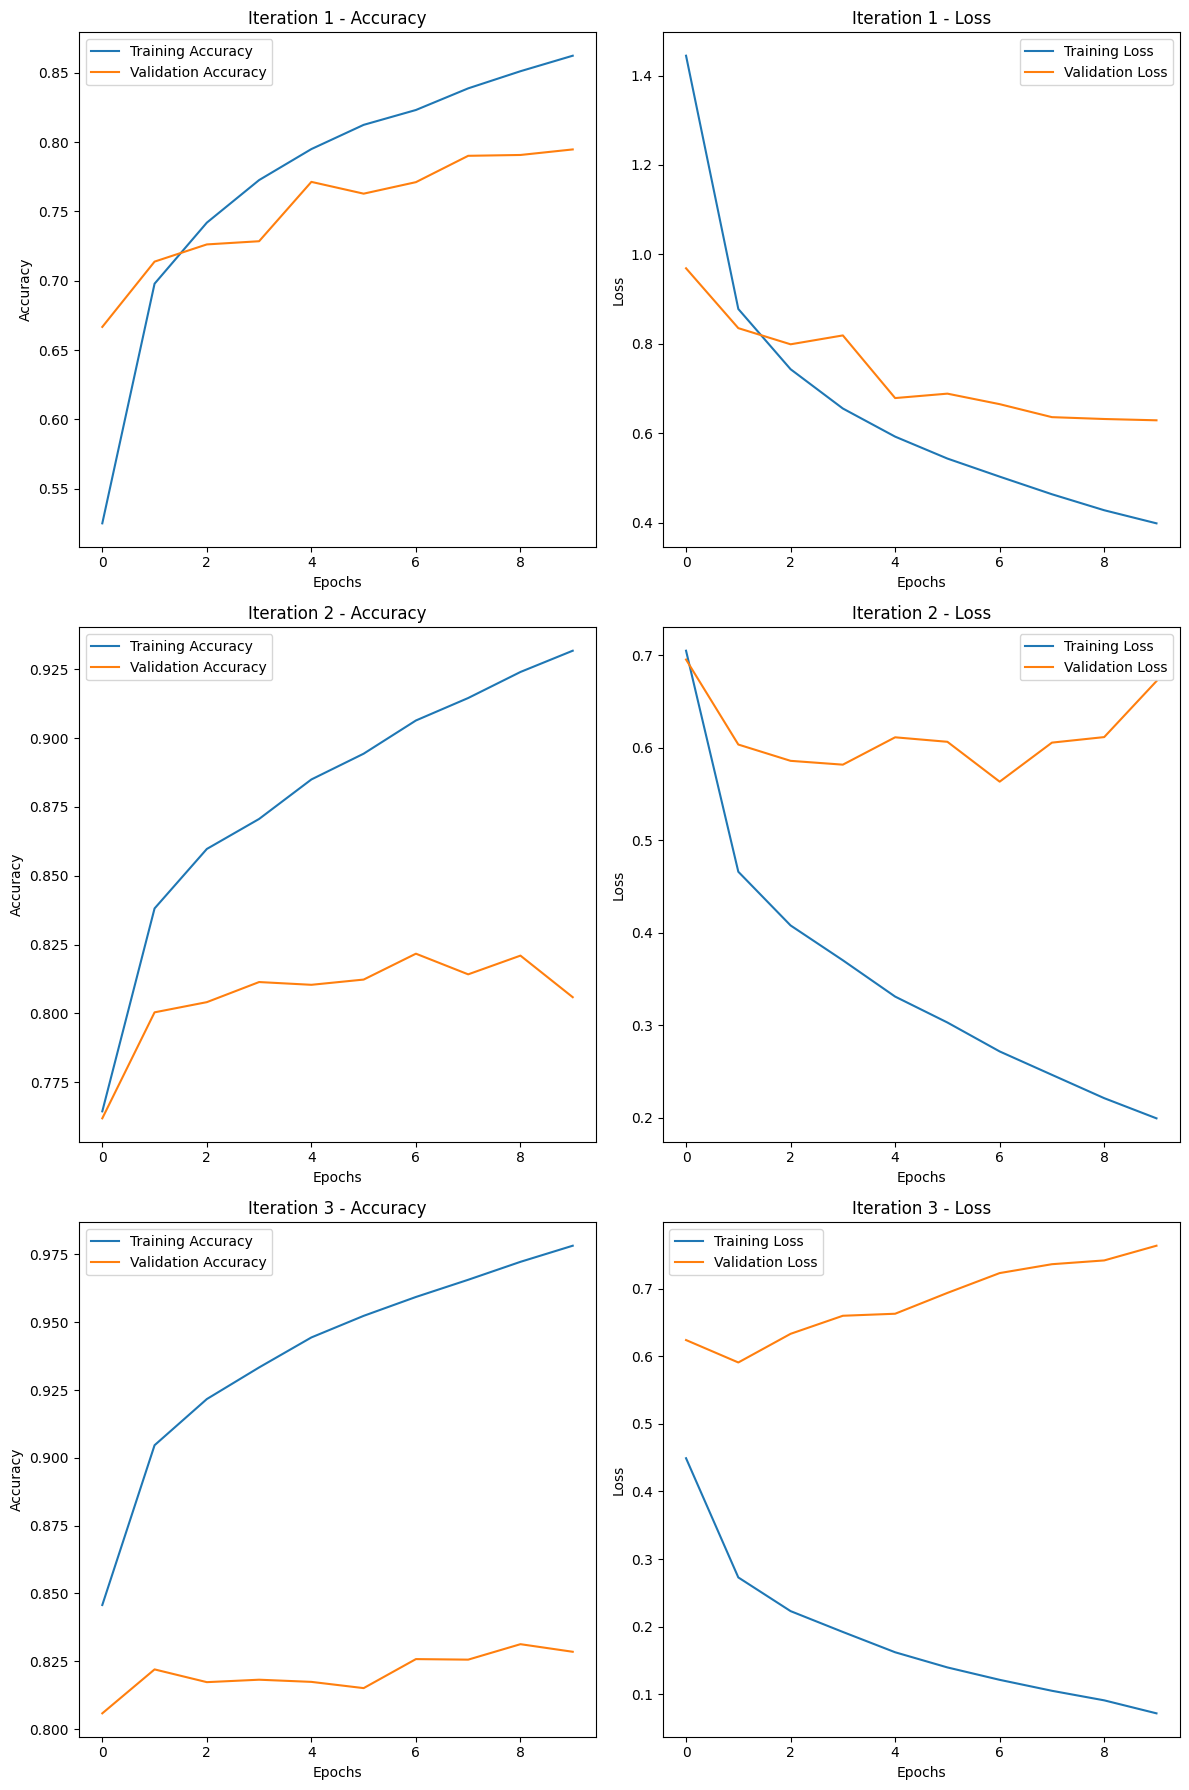

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import seaborn as sns

def piecewise_activation(x):
    return tf.where(x > 0, x, tf.zeros_like(x))

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


Tanh

Iteration 1
Epoch 1/10
391/391 [==============================] - 88s 223ms/step - loss: 2.1494 - accuracy: 0.2295 - val_loss: 1.9358 - val_accuracy: 0.2983
Epoch 2/10
391/391 [==============================] - 86s 220ms/step - loss: 1.8112 - accuracy: 0.3426 - val_loss: 1.7052 - val_accuracy: 0.3804
Epoch 3/10
391/391 [==============================] - 86s 220ms/step - loss: 1.6390 - accuracy: 0.4067 - val_loss: 1.6033 - val_accuracy: 0.4218
Epoch 4/10
391/391 [==============================] - 86s 220ms/step - loss: 1.5294 - accuracy: 0.4447 - val_loss: 1.4809 - val_accuracy: 0.4605
Epoch 5/10
391/391 [==============================] - 86s 220ms/step - loss: 1.4481 - accuracy: 0.4732 - val_loss: 1.4116 - val_accuracy: 0.4852
Epoch 6/10
391/391 [==============================] - 86s 219ms/step - loss: 1.3805 - accuracy: 0.4987 - val_loss: 1.3529 - val_accuracy: 0.5086
Epoch 7/10
391/391 [==============================] - 85s 218ms/step - loss: 1.3214 - accuracy: 0.5220 - val_loss: 1.3

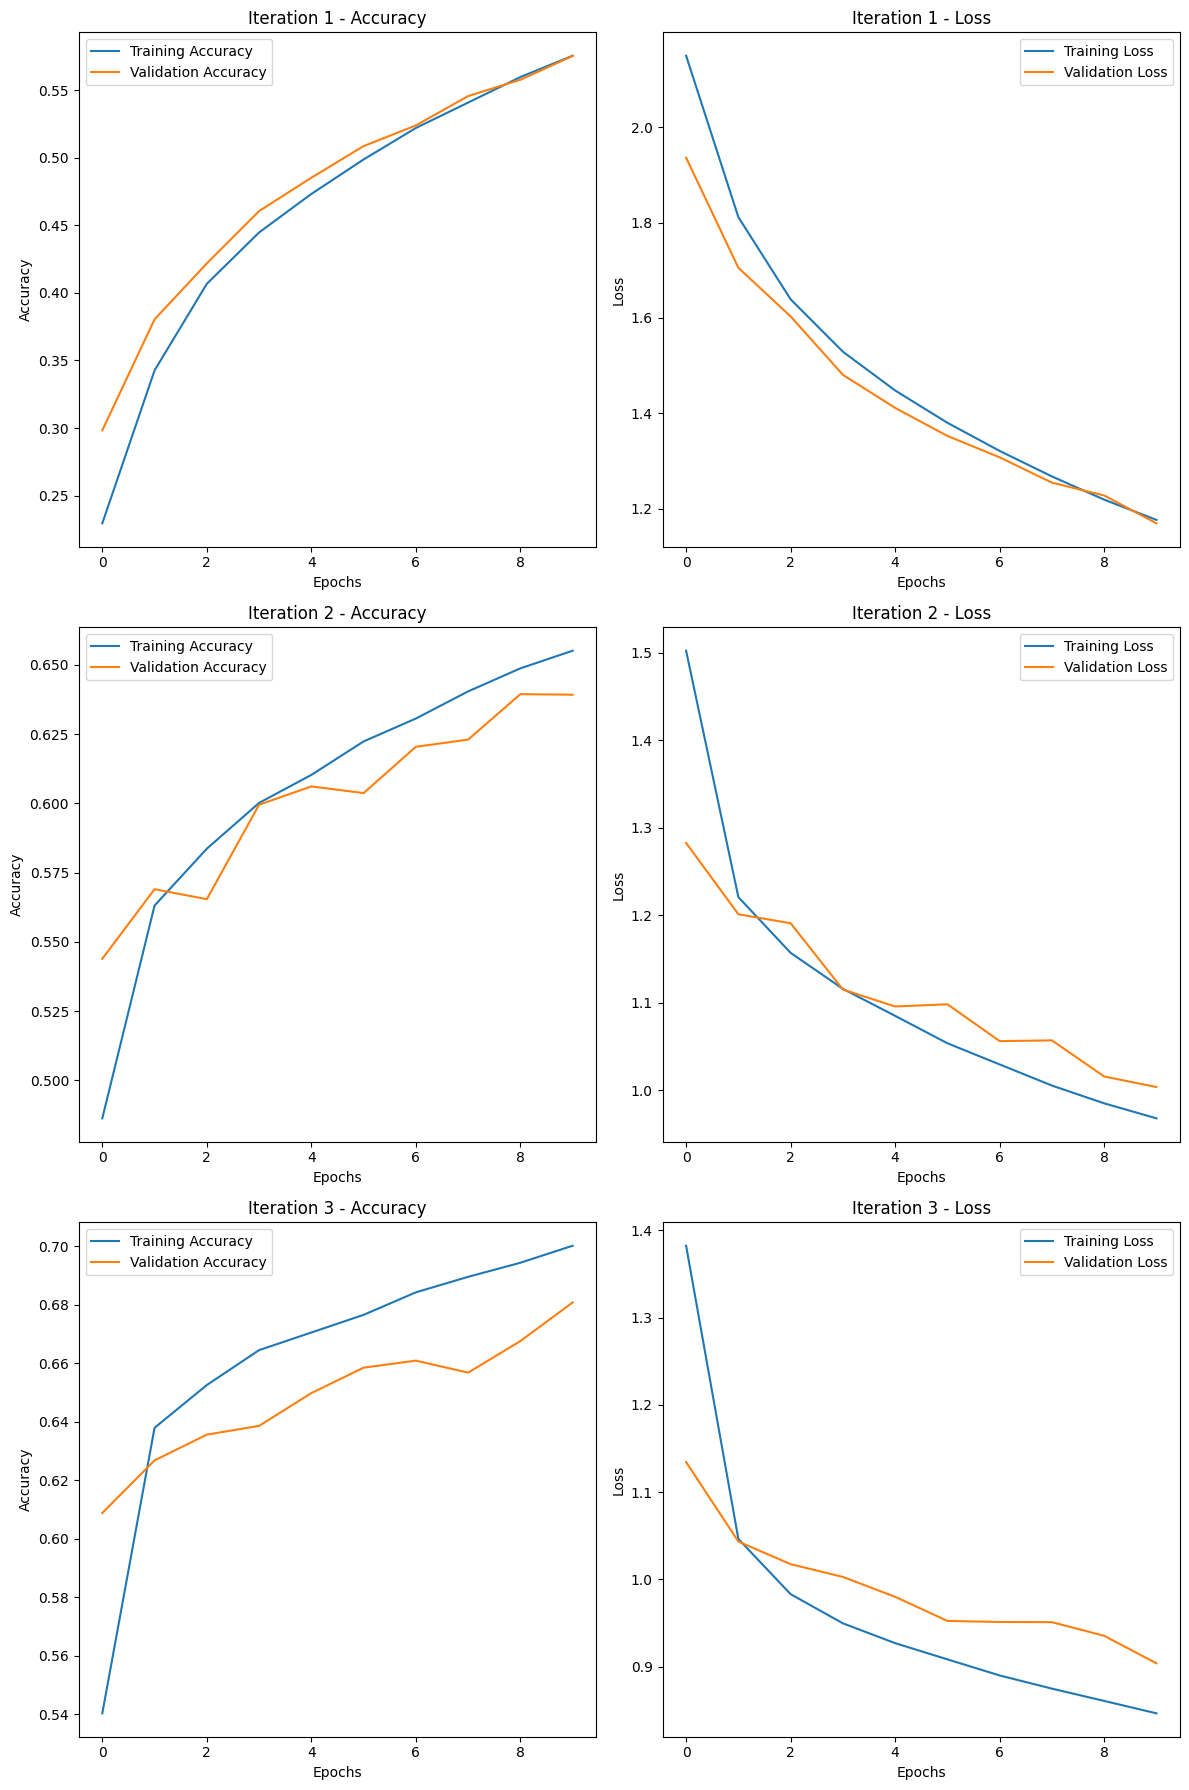

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn


def piecewise_activation(x):
    return tf.keras.activations.tanh(x)

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


Sigmoid

Iteration 1
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 66ms/step - accuracy: 0.1007 - loss: 2.3537 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.0999 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.1015 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.0967 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - accuracy: 0.0963 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 63ms/step - accuracy: 0.0977 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.1038 - los

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 67ms/step - accuracy: 0.1001 - loss: 2.3676 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 62ms/step - accuracy: 0.0969 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.1014 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.0994 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.0995 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.1004 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - accuracy: 0.1017 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.0975 - loss: 2.3029 - 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 65ms/step - accuracy: 0.0988 - loss: 2.3291 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.1009 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.0982 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.0977 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 63ms/step - accuracy: 0.0968 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.0996 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.1016 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 63ms/step - accuracy: 0.0990 - loss: 2.3028 - 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


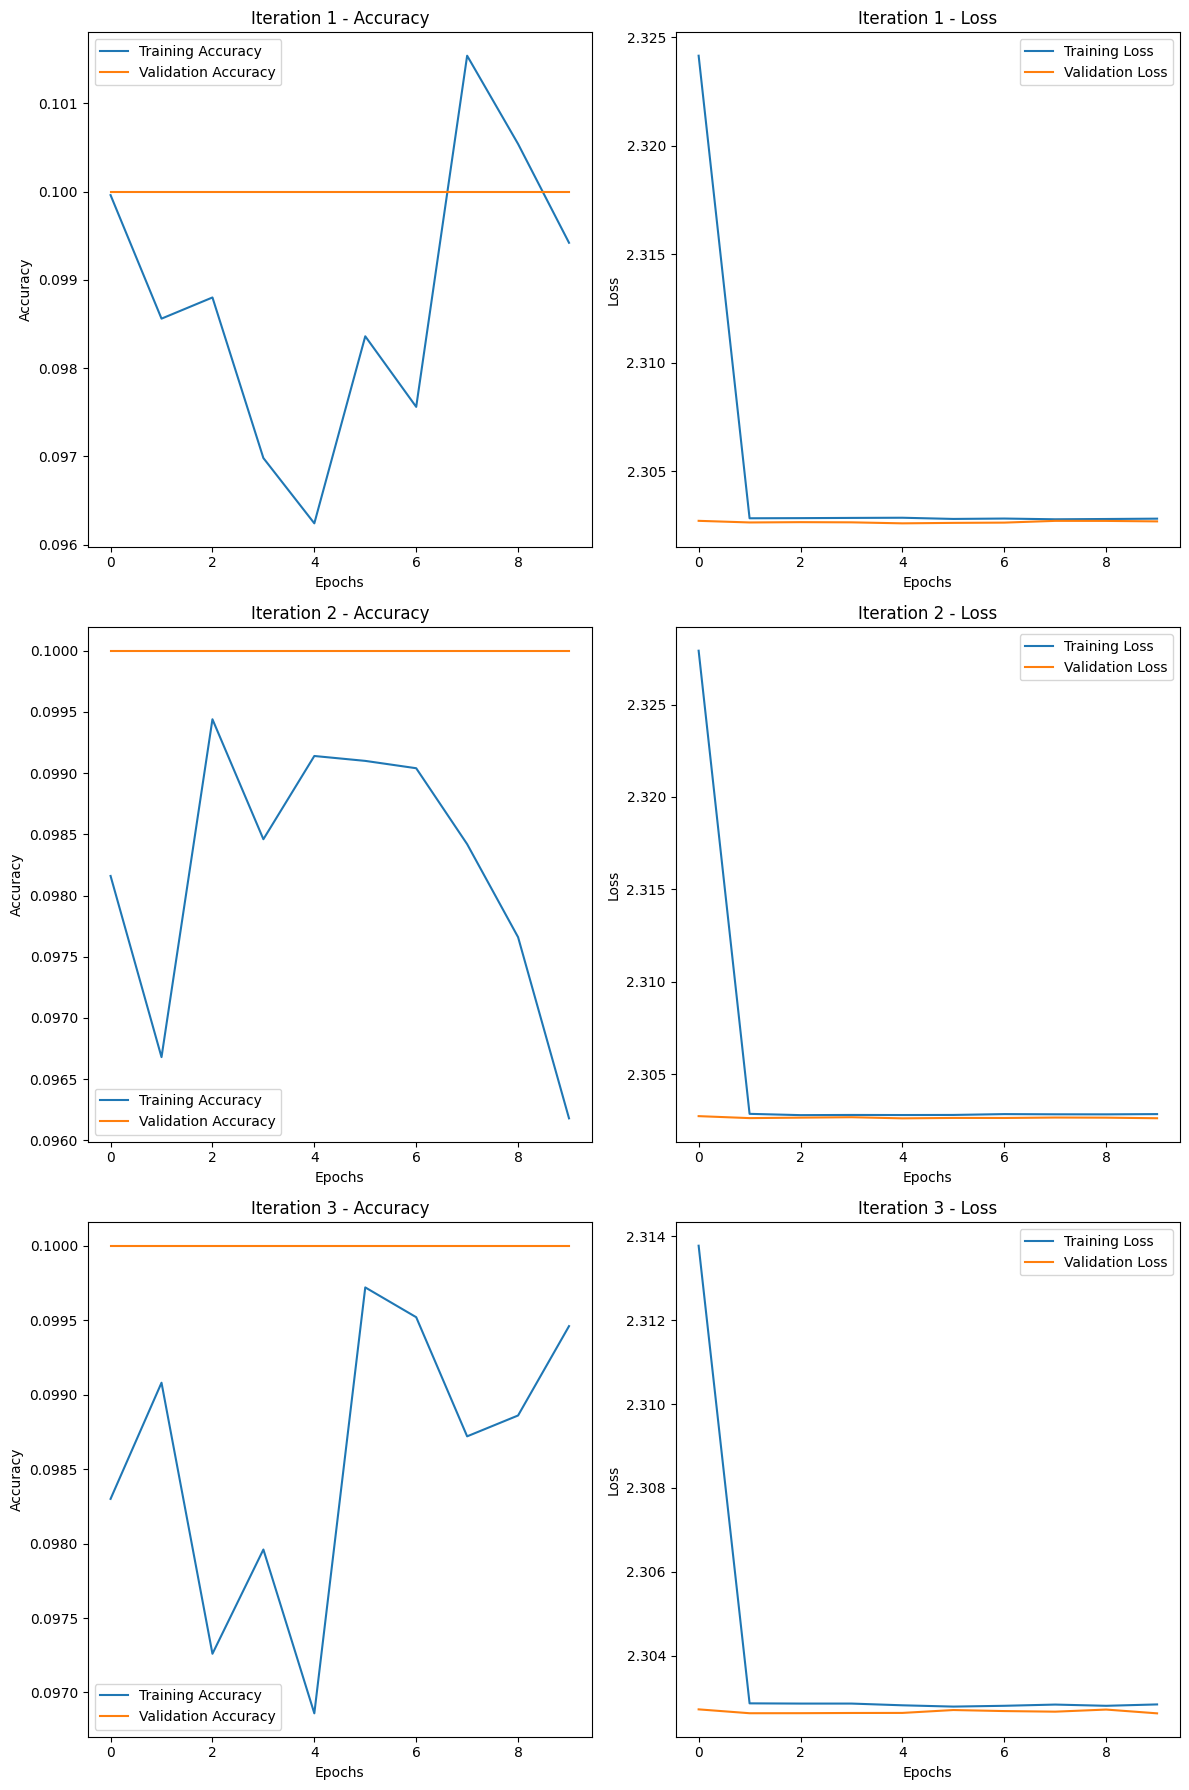

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn
from sklearn.metrics import classification_report
import seaborn as sns


def piecewise_activation(x):
    return tf.keras.activations.sigmoid(x)


# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


Softplus

Iteration 1
Epoch 1/10
391/391 [==============================] - 96s 245ms/step - loss: 1.6126 - accuracy: 0.4549 - val_loss: 0.9942 - val_accuracy: 0.6545
Epoch 2/10
391/391 [==============================] - 96s 246ms/step - loss: 0.9085 - accuracy: 0.6847 - val_loss: 0.8801 - val_accuracy: 0.6917
Epoch 3/10
391/391 [==============================] - 96s 245ms/step - loss: 0.7506 - accuracy: 0.7424 - val_loss: 0.8045 - val_accuracy: 0.7222
Epoch 4/10
391/391 [==============================] - 96s 246ms/step - loss: 0.6662 - accuracy: 0.7676 - val_loss: 0.7257 - val_accuracy: 0.7513
Epoch 5/10
391/391 [==============================] - 97s 247ms/step - loss: 0.6011 - accuracy: 0.7907 - val_loss: 0.6650 - val_accuracy: 0.7727
Epoch 6/10
391/391 [==============================] - 96s 245ms/step - loss: 0.5465 - accuracy: 0.8096 - val_loss: 0.6413 - val_accuracy: 0.7804
Epoch 7/10
391/391 [==============================] - 96s 245ms/step - loss: 0.5027 - accuracy: 0.8253 - val_loss: 0.6

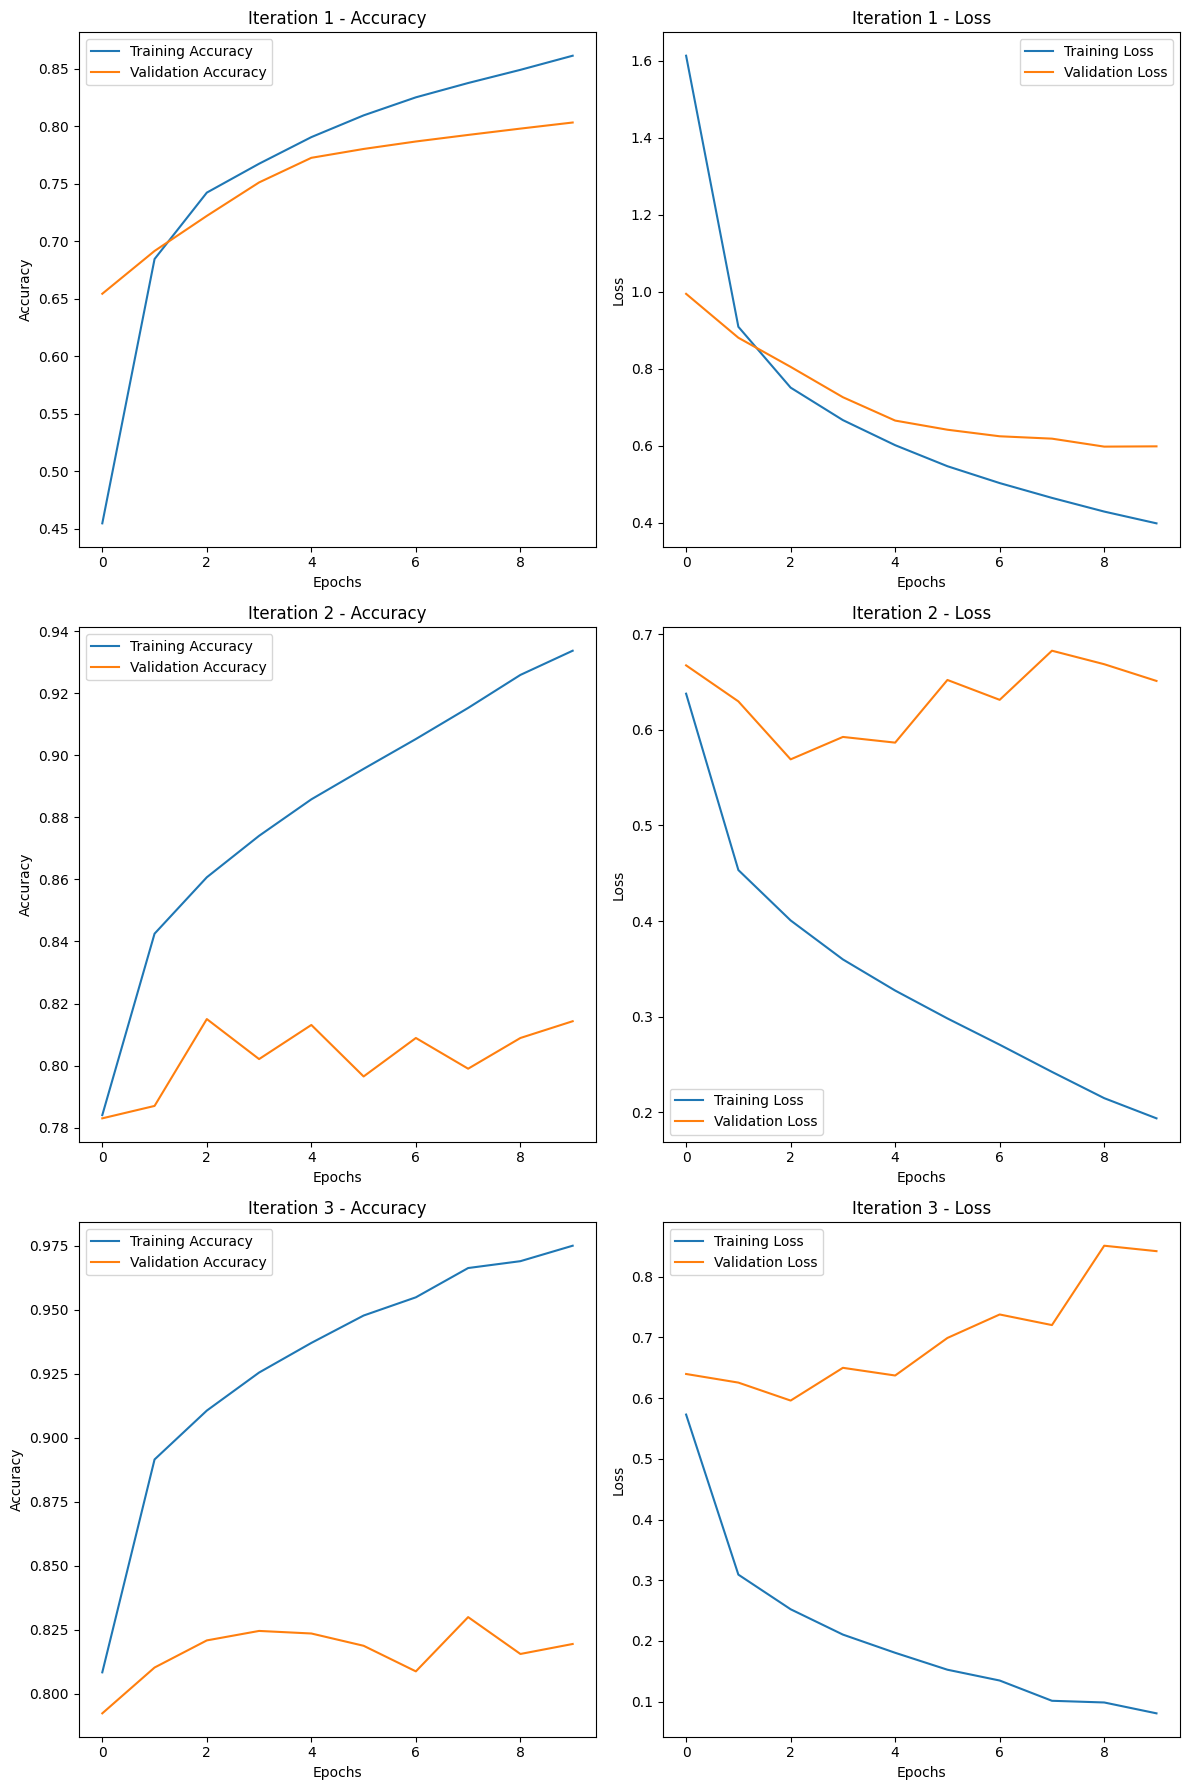

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn

def piecewise_activation(x):
    return tf.keras.activations.softplus(x)

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


Softsign

Iteration 1
Epoch 1/10
391/391 [==============================] - 89s 226ms/step - loss: 2.3003 - accuracy: 0.1473 - val_loss: 2.2917 - val_accuracy: 0.1681
Epoch 2/10
391/391 [==============================] - 88s 226ms/step - loss: 2.2856 - accuracy: 0.1782 - val_loss: 2.2784 - val_accuracy: 0.1806
Epoch 3/10
391/391 [==============================] - 88s 226ms/step - loss: 2.2650 - accuracy: 0.2230 - val_loss: 2.2470 - val_accuracy: 0.2474
Epoch 4/10
391/391 [==============================] - 88s 225ms/step - loss: 2.2102 - accuracy: 0.2492 - val_loss: 2.1588 - val_accuracy: 0.2464
Epoch 5/10
391/391 [==============================] - 88s 226ms/step - loss: 2.0873 - accuracy: 0.2596 - val_loss: 2.0167 - val_accuracy: 0.2680
Epoch 6/10
391/391 [==============================] - 88s 226ms/step - loss: 1.9628 - accuracy: 0.2807 - val_loss: 1.9115 - val_accuracy: 0.2912
Epoch 7/10
391/391 [==============================] - 88s 226ms/step - loss: 1.8724 - accuracy: 0.3038 - val_loss: 1.8

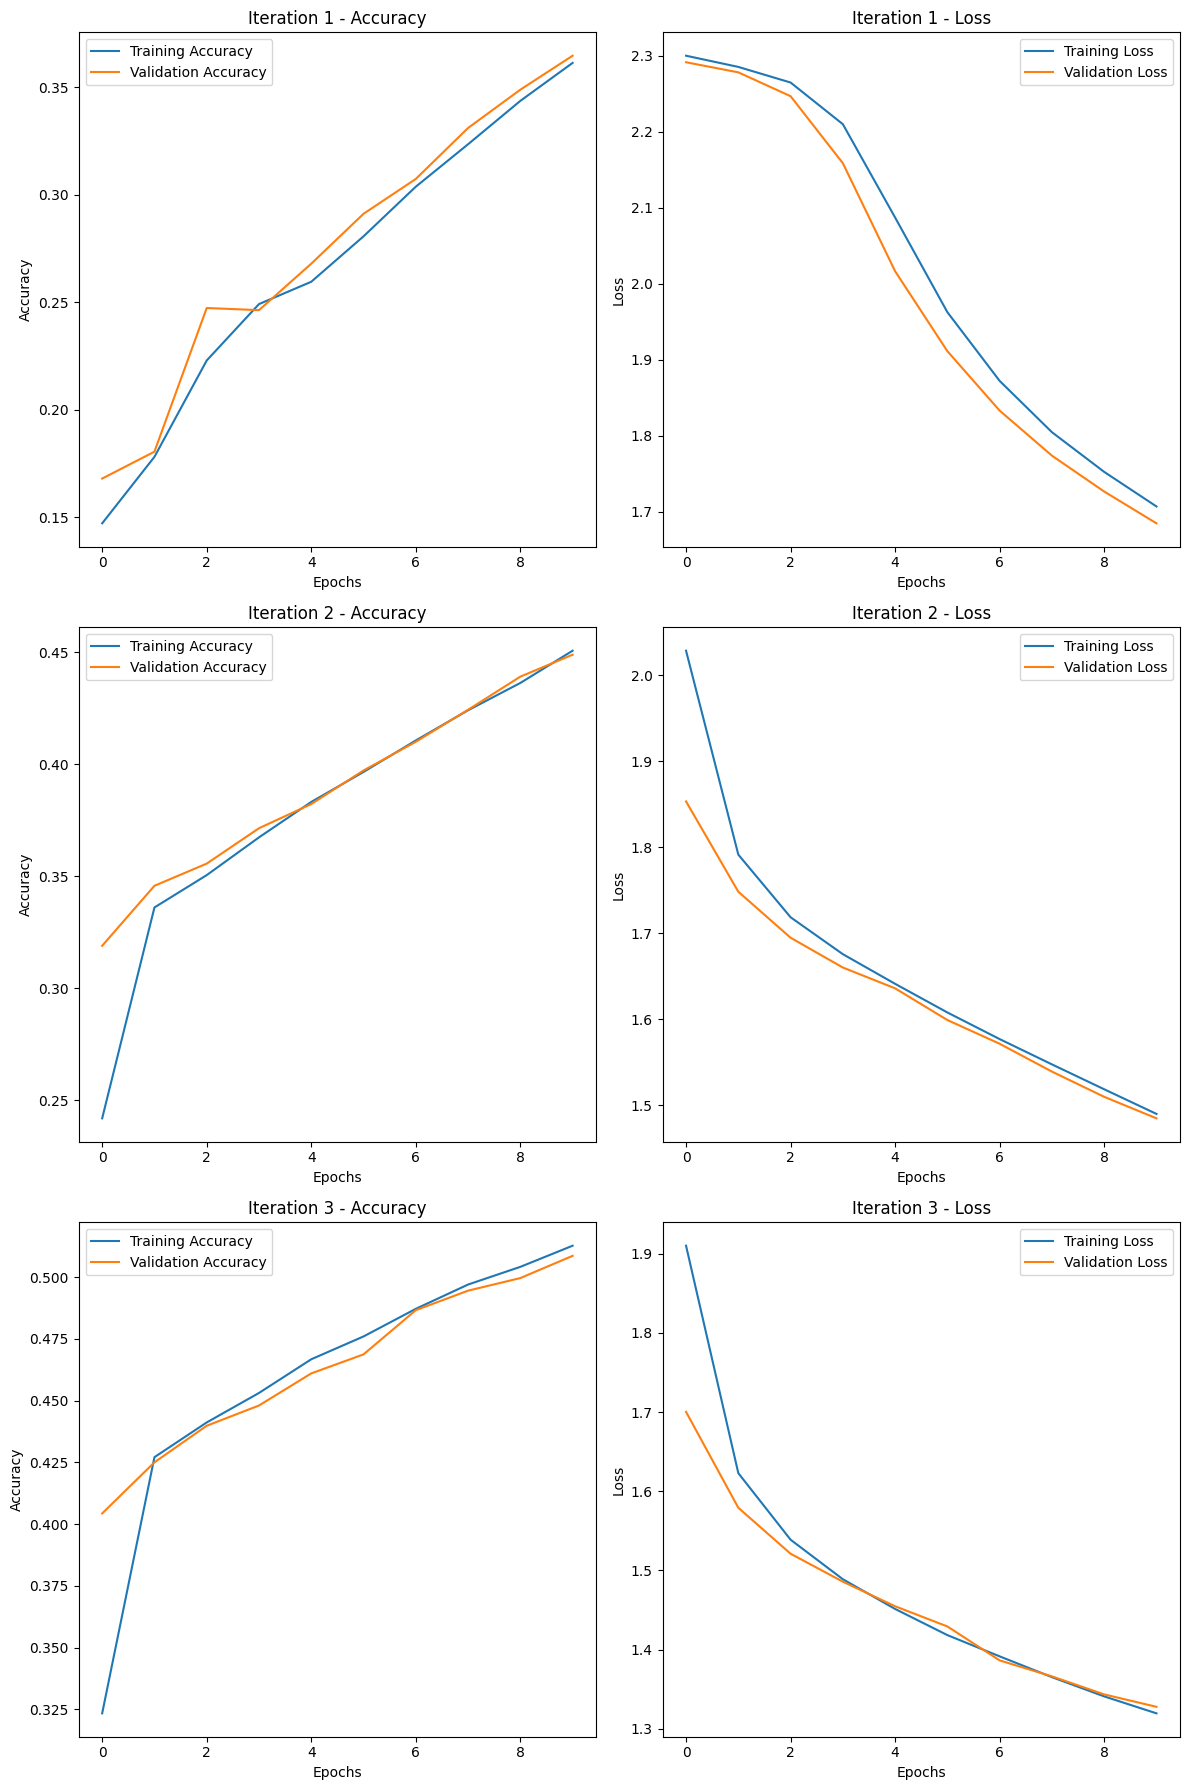

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn

def piecewise_activation(x):
    return tf.keras.activations.softsign(x)


# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


Swish

Iteration 1
Epoch 1/10
391/391 [==============================] - 95s 241ms/step - loss: 1.5267 - accuracy: 0.4938 - val_loss: 1.1064 - val_accuracy: 0.6023
Epoch 2/10
391/391 [==============================] - 94s 241ms/step - loss: 0.9120 - accuracy: 0.6821 - val_loss: 0.8220 - val_accuracy: 0.7163
Epoch 3/10
391/391 [==============================] - 94s 241ms/step - loss: 0.7644 - accuracy: 0.7336 - val_loss: 0.7504 - val_accuracy: 0.7422
Epoch 4/10
391/391 [==============================] - 95s 242ms/step - loss: 0.6793 - accuracy: 0.7643 - val_loss: 0.7474 - val_accuracy: 0.7454
Epoch 5/10
391/391 [==============================] - 94s 241ms/step - loss: 0.6159 - accuracy: 0.7868 - val_loss: 0.6982 - val_accuracy: 0.7643
Epoch 6/10
391/391 [==============================] - 94s 241ms/step - loss: 0.5657 - accuracy: 0.8021 - val_loss: 0.7915 - val_accuracy: 0.7349
Epoch 7/10
391/391 [==============================] - 95s 243ms/step - loss: 0.5268 - accuracy: 0.8179 - val_loss: 0.6

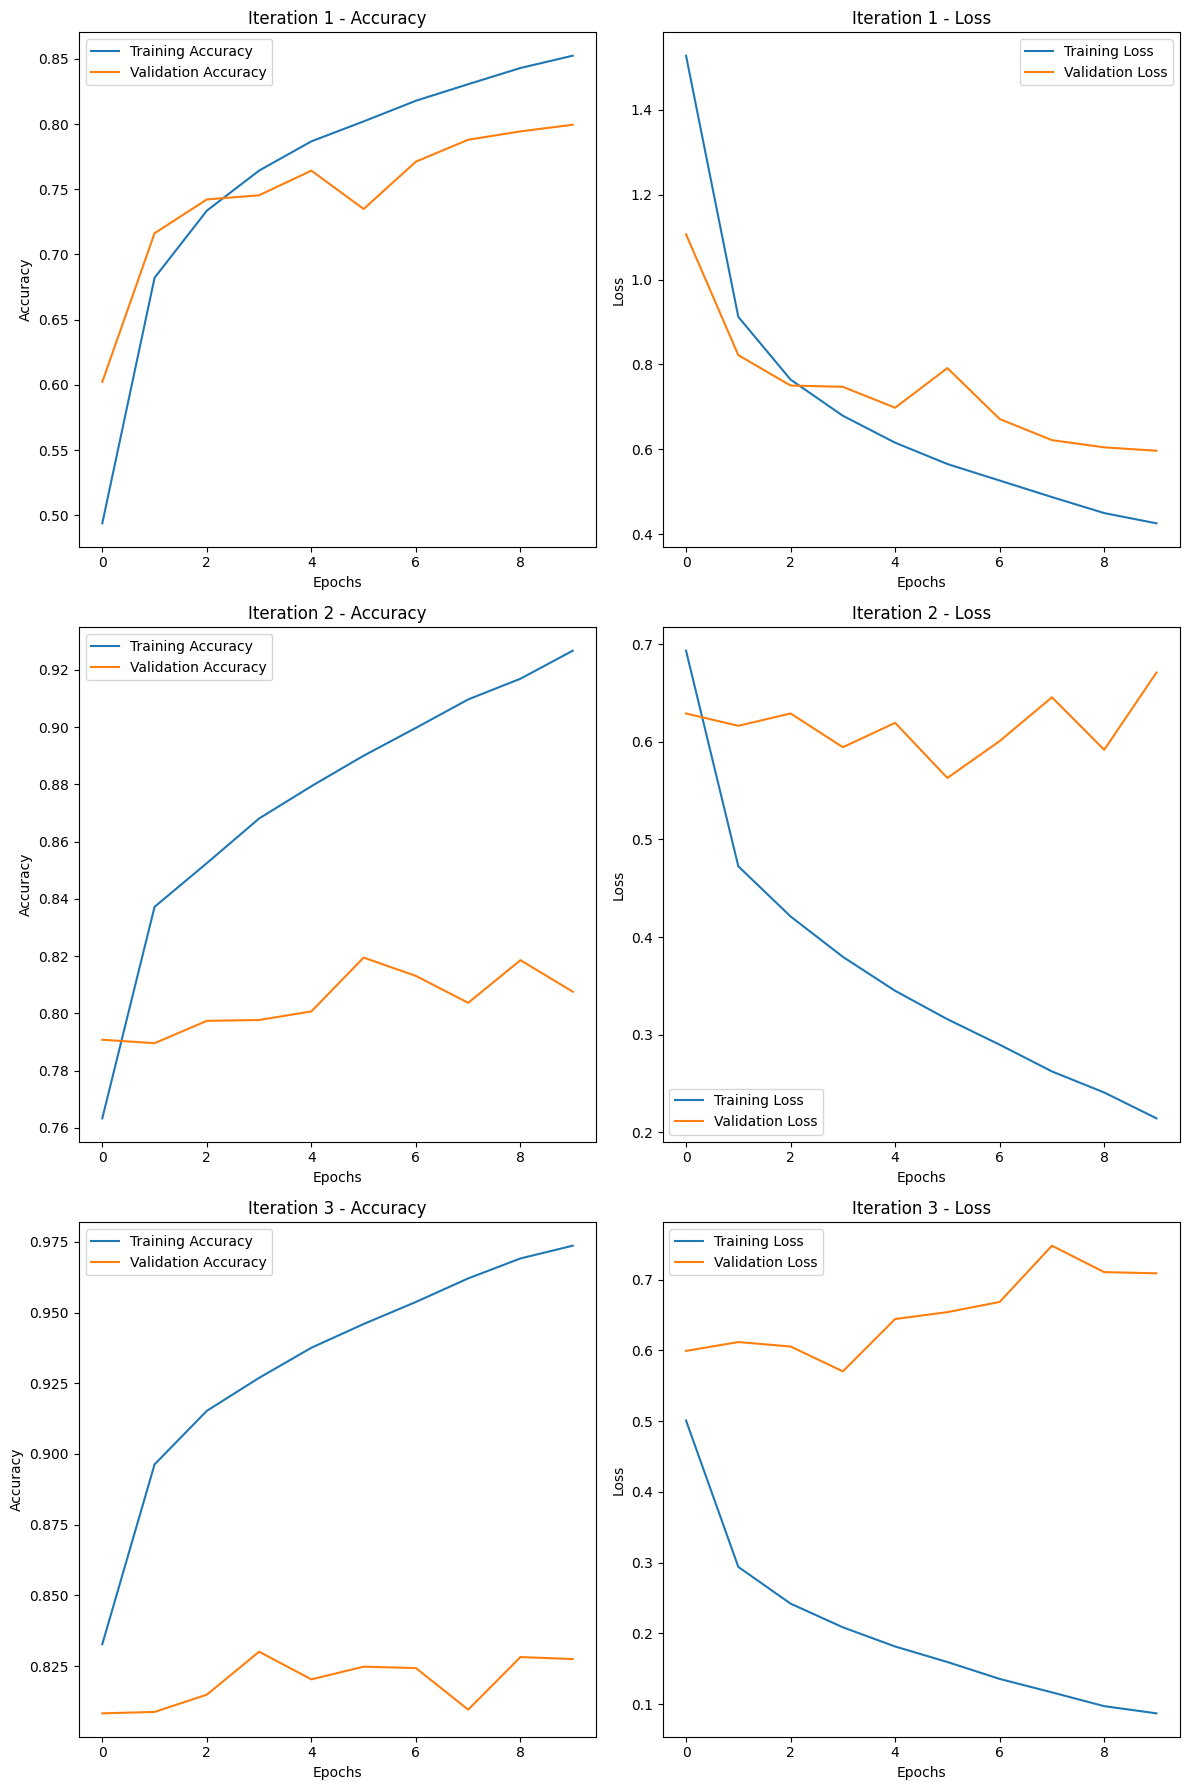

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn


def piecewise_activation(x):
    return tf.keras.activations.swish(x)

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


Mish

Iteration 1
Epoch 1/10
391/391 [==============================] - 182s 462ms/step - loss: 1.6027 - accuracy: 0.4595 - val_loss: 1.2032 - val_accuracy: 0.5830
Epoch 2/10
391/391 [==============================] - 180s 461ms/step - loss: 0.9529 - accuracy: 0.6674 - val_loss: 0.9780 - val_accuracy: 0.6594
Epoch 3/10
391/391 [==============================] - 182s 466ms/step - loss: 0.7937 - accuracy: 0.7251 - val_loss: 0.8218 - val_accuracy: 0.7108
Epoch 4/10
391/391 [==============================] - 183s 467ms/step - loss: 0.6933 - accuracy: 0.7598 - val_loss: 0.8255 - val_accuracy: 0.7235
Epoch 5/10
391/391 [==============================] - 123s 313ms/step - loss: 0.6306 - accuracy: 0.7808 - val_loss: 0.7396 - val_accuracy: 0.7410
Epoch 6/10
391/391 [==============================] - 103s 263ms/step - loss: 0.5744 - accuracy: 0.8004 - val_loss: 0.6781 - val_accuracy: 0.7658
Epoch 7/10
391/391 [==============================] - 102s 262ms/step - loss: 0.5296 - accuracy: 0.8132 - val_lo

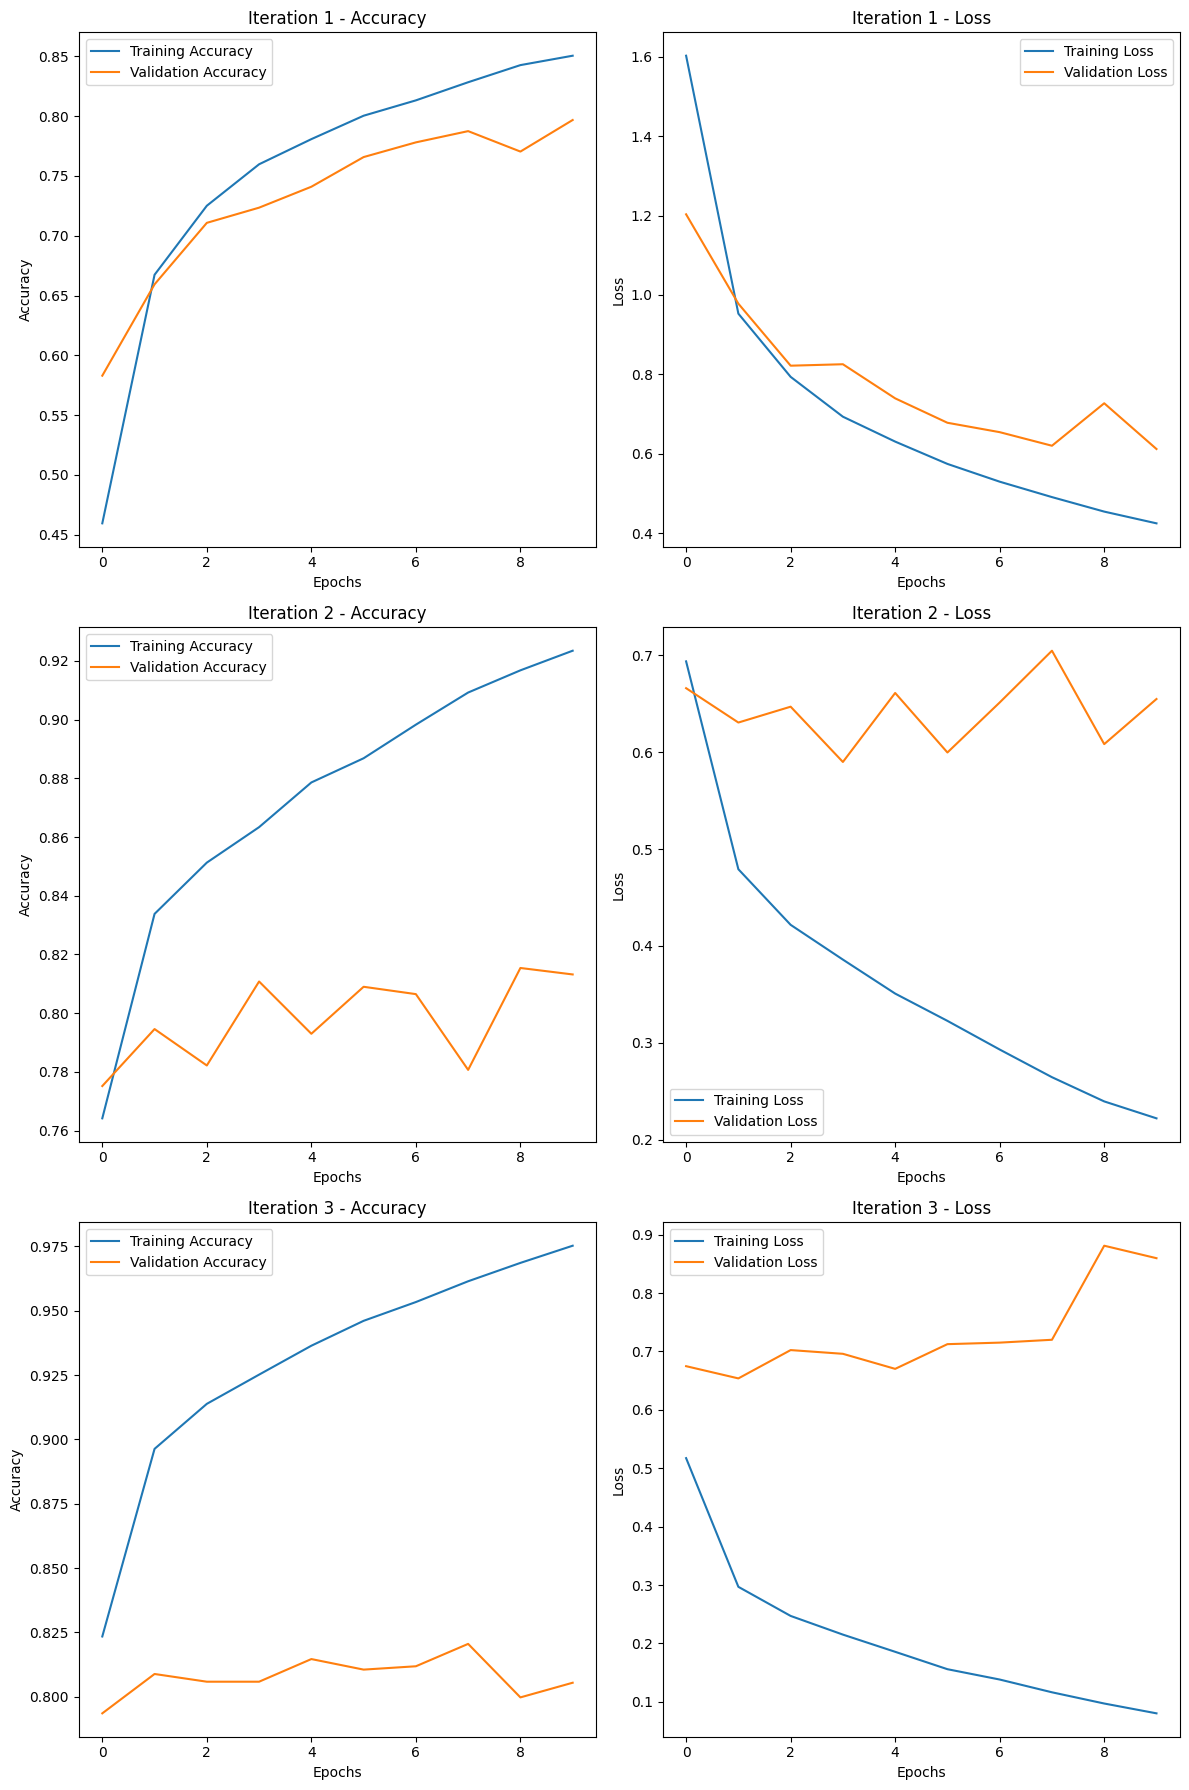

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist,cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn
from sklearn.metrics import classification_report
def m_ish(x):
    return x * tf.tanh(tf.math.softplus(x))
def piecewise_activation(x):
    return m_ish(x)


# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


SELU

Iteration 1
Epoch 1/10
391/391 [==============================] - 88s 223ms/step - loss: 1.9164 - accuracy: 0.4930 - val_loss: 1.1314 - val_accuracy: 0.6025
Epoch 2/10
391/391 [==============================] - 87s 224ms/step - loss: 0.9686 - accuracy: 0.6600 - val_loss: 0.9653 - val_accuracy: 0.6564
Epoch 3/10
391/391 [==============================] - 88s 224ms/step - loss: 0.8030 - accuracy: 0.7199 - val_loss: 0.8363 - val_accuracy: 0.7066
Epoch 4/10
391/391 [==============================] - 88s 225ms/step - loss: 0.7024 - accuracy: 0.7566 - val_loss: 0.7907 - val_accuracy: 0.7229
Epoch 5/10
391/391 [==============================] - 88s 225ms/step - loss: 0.6324 - accuracy: 0.7798 - val_loss: 0.7292 - val_accuracy: 0.7479
Epoch 6/10
391/391 [==============================] - 88s 225ms/step - loss: 0.5712 - accuracy: 0.8010 - val_loss: 0.6881 - val_accuracy: 0.7586
Epoch 7/10
391/391 [==============================] - 88s 225ms/step - loss: 0.5175 - accuracy: 0.8196 - val_loss: 0.7

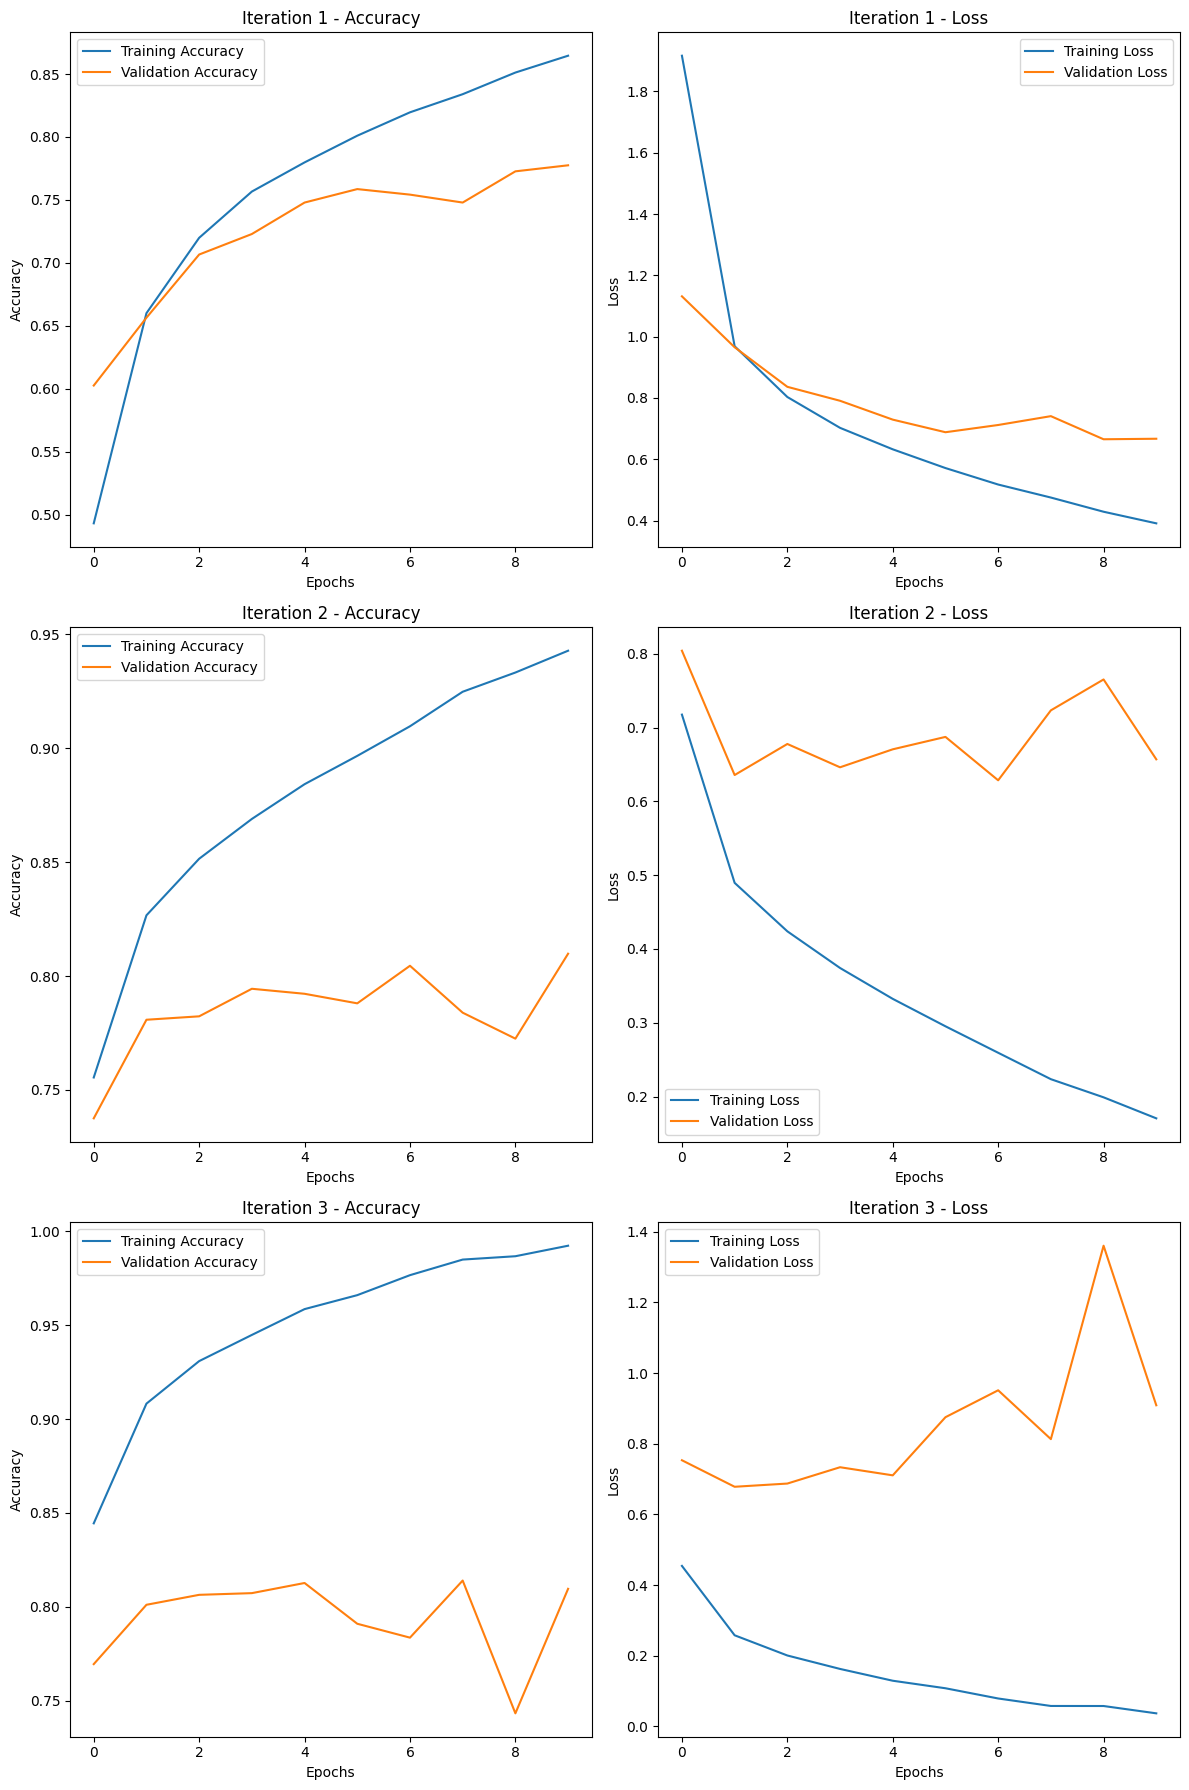

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn


def piecewise_activation(x):
    return tf.keras.activations.selu(x)

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


ELU

Iteration 1
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 48s 87ms/step - accuracy: 0.3779 - loss: 2.3596 - val_accuracy: 0.6324 - val_loss: 1.0356
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 61ms/step - accuracy: 0.6721 - loss: 0.9322 - val_accuracy: 0.7055 - val_loss: 0.8474
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.7291 - loss: 0.7712 - val_accuracy: 0.7274 - val_loss: 0.7927
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.7663 - loss: 0.6734 - val_accuracy: 0.7514 - val_loss: 0.7148
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.7882 - loss: 0.6060 - val_accuracy: 0.7671 - val_loss: 0.6715
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.8046 - loss: 0.5500 - val_accuracy: 0.7555 - val_loss: 0.7462
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.8227 - loss: 0.5036 - val_accuracy: 0.7778 - val_loss: 0.6550
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.8320 - los

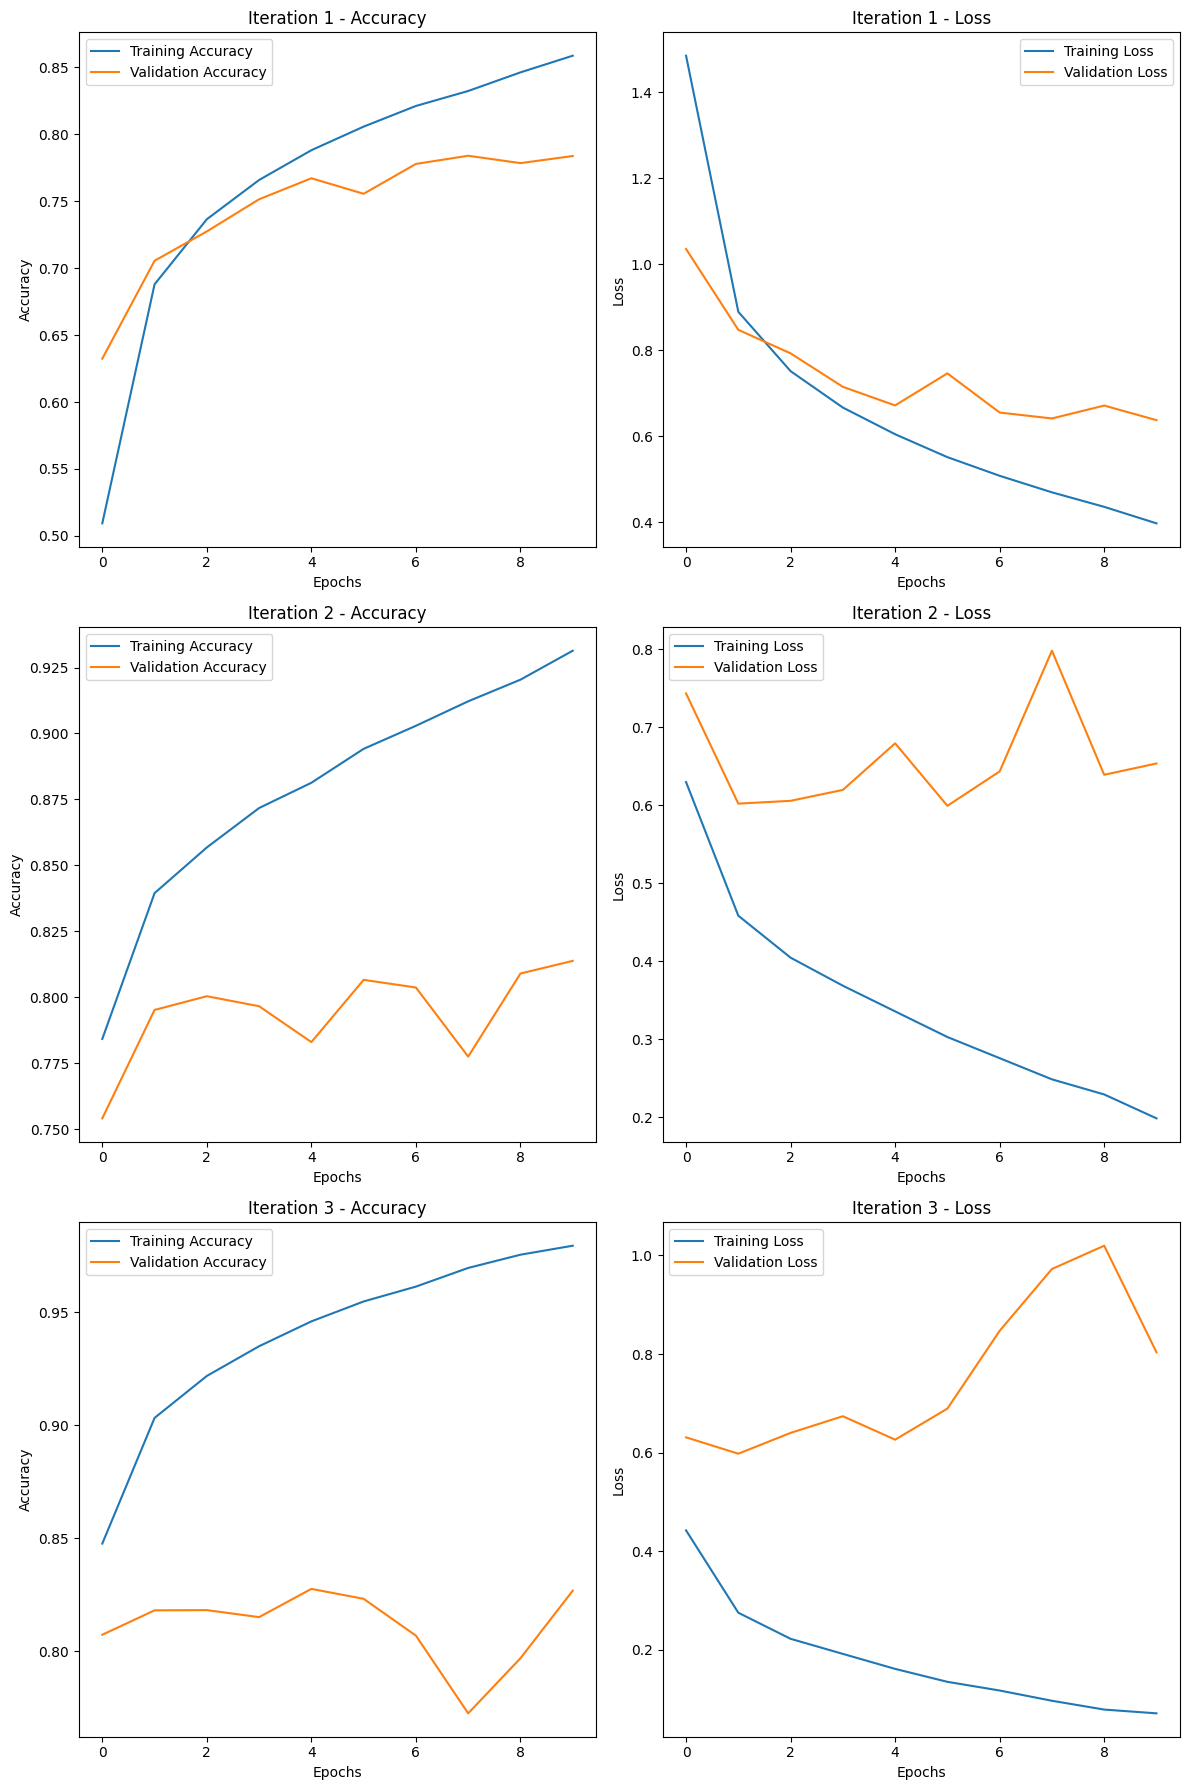

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist,cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report


def piecewise_activation(x):
    return tf.keras.activations.elu(x)


# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


LRELU

Iteration 1
Epoch 1/10
391/391 [==============================] - 96s 244ms/step - loss: 1.5751 - accuracy: 0.4752 - val_loss: 1.0836 - val_accuracy: 0.6210
Epoch 2/10
391/391 [==============================] - 95s 244ms/step - loss: 0.9583 - accuracy: 0.6652 - val_loss: 0.8725 - val_accuracy: 0.6970
Epoch 3/10
391/391 [==============================] - 96s 244ms/step - loss: 0.8002 - accuracy: 0.7216 - val_loss: 0.8206 - val_accuracy: 0.7135
Epoch 4/10
391/391 [==============================] - 95s 244ms/step - loss: 0.7071 - accuracy: 0.7556 - val_loss: 0.7640 - val_accuracy: 0.7362
Epoch 5/10
391/391 [==============================] - 95s 244ms/step - loss: 0.6409 - accuracy: 0.7760 - val_loss: 0.6964 - val_accuracy: 0.7616
Epoch 6/10
391/391 [==============================] - 96s 245ms/step - loss: 0.5911 - accuracy: 0.7947 - val_loss: 0.6969 - val_accuracy: 0.7595
Epoch 7/10
391/391 [==============================] - 95s 244ms/step - loss: 0.5484 - accuracy: 0.8098 - val_loss: 0.6

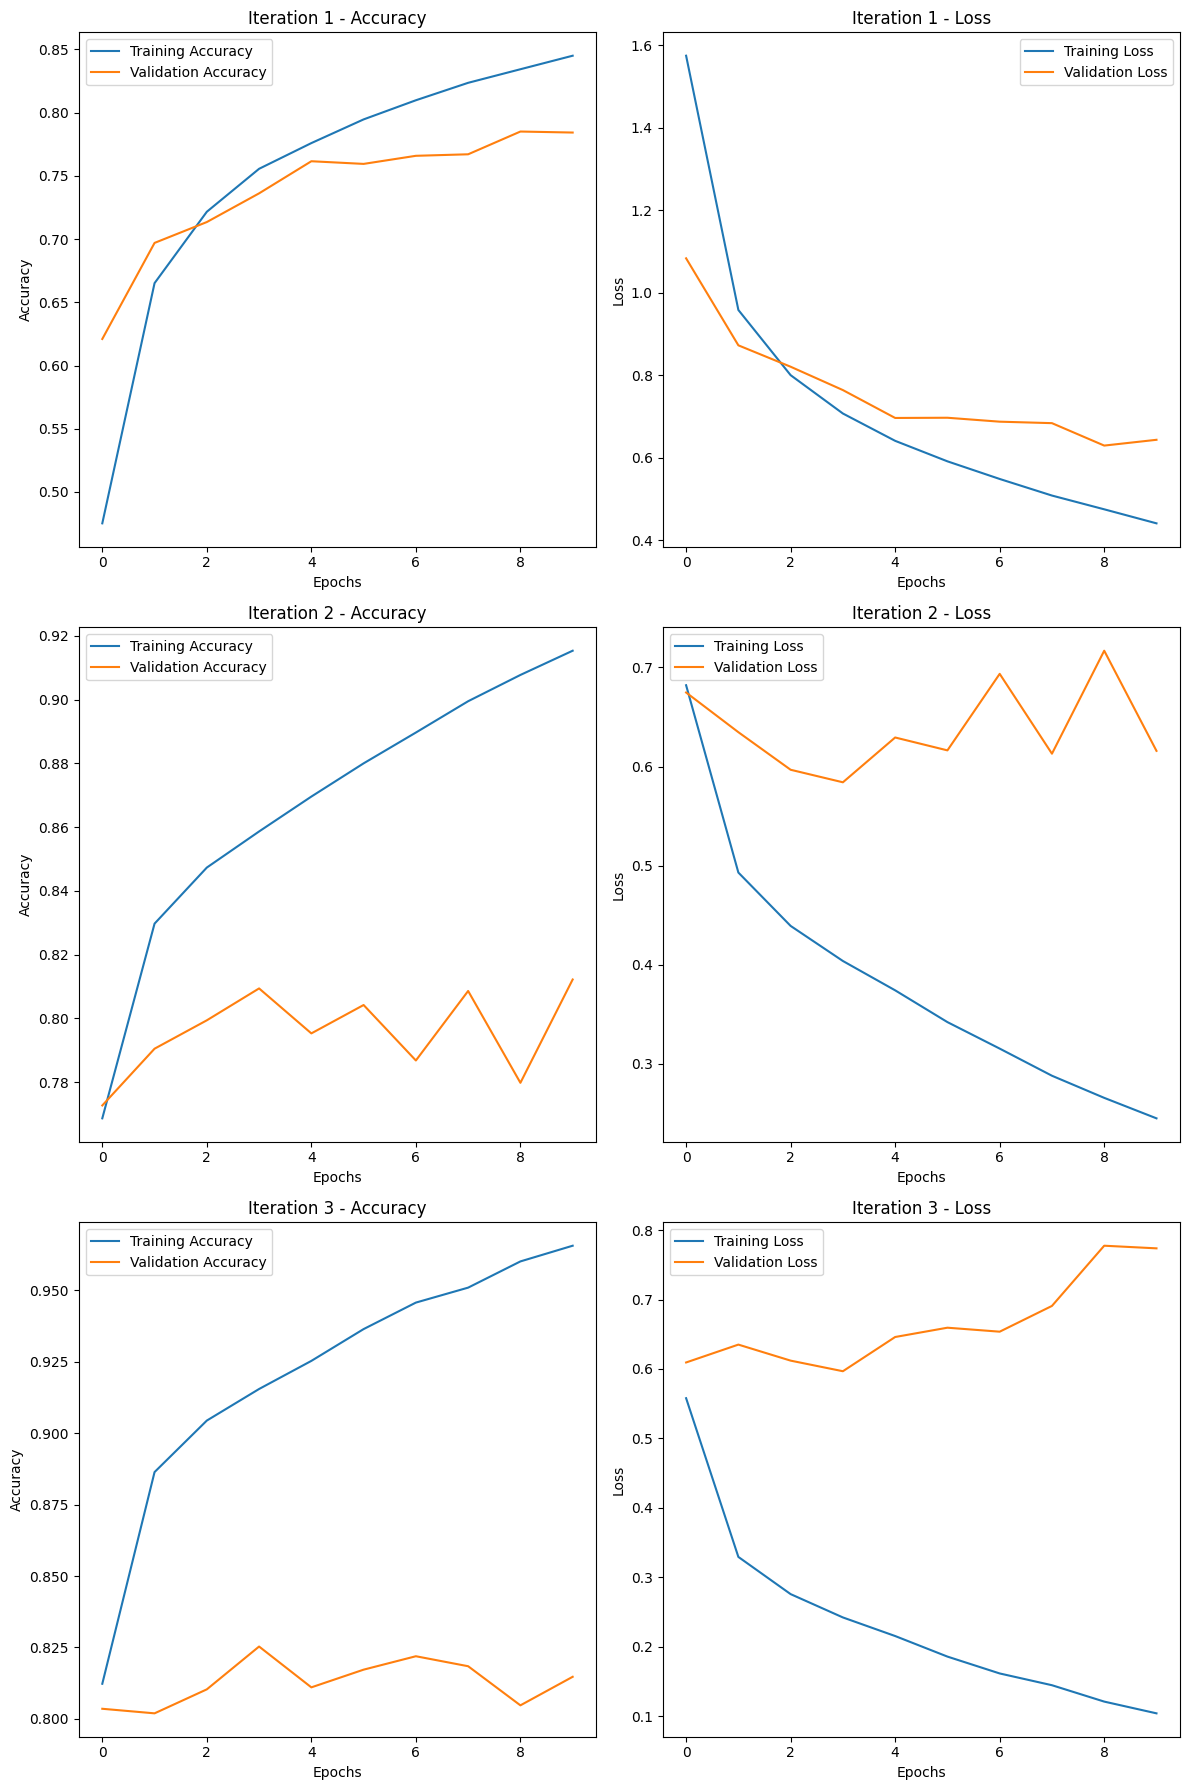

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist, cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn


def piecewise_activation(x):
    return tf.where(x > 0, x, 0.01*(x))

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


ReLU+Tanh

Iteration 1
Epoch 1/10
391/391 [==============================] - 98s 249ms/step - loss: 1.4196 - accuracy: 0.5336 - val_loss: 1.1136 - val_accuracy: 0.6228
Epoch 2/10
391/391 [==============================] - 97s 249ms/step - loss: 0.8587 - accuracy: 0.7009 - val_loss: 0.8578 - val_accuracy: 0.7050
Epoch 3/10
391/391 [==============================] - 97s 248ms/step - loss: 0.7199 - accuracy: 0.7483 - val_loss: 0.7635 - val_accuracy: 0.7310
Epoch 4/10
391/391 [==============================] - 97s 248ms/step - loss: 0.6395 - accuracy: 0.7760 - val_loss: 0.6955 - val_accuracy: 0.7577
Epoch 5/10
391/391 [==============================] - 97s 248ms/step - loss: 0.5759 - accuracy: 0.7983 - val_loss: 0.6735 - val_accuracy: 0.7670
Epoch 6/10
391/391 [==============================] - 97s 248ms/step - loss: 0.5267 - accuracy: 0.8152 - val_loss: 0.7241 - val_accuracy: 0.7557
Epoch 7/10
391/391 [==============================] - 97s 248ms/step - loss: 0.4816 - accuracy: 0.8301 - val_loss: 0.6

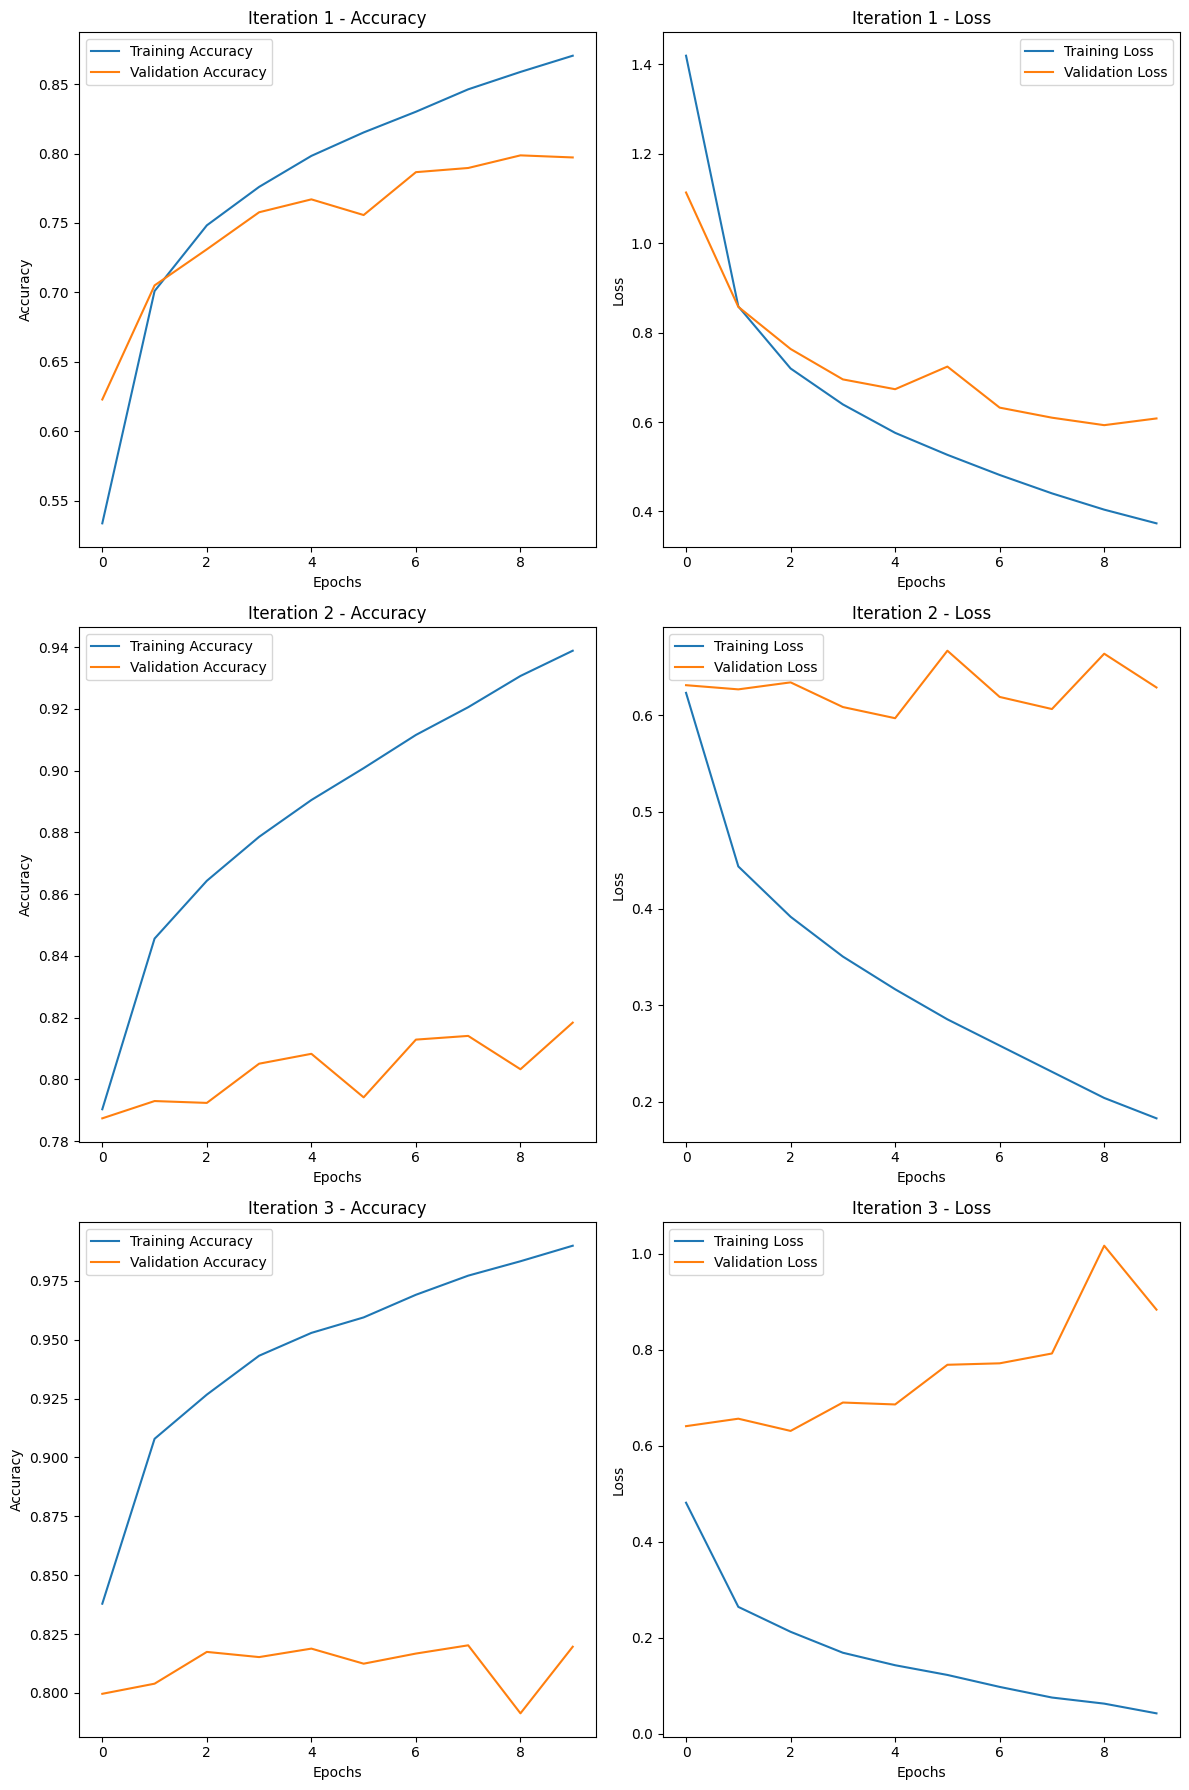

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist,cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn


def piecewise_activation(x):
    return tf.where(x > 0, x, tf.tanh(x))


# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


ReLU+Sigmoid

Iteration 1
Epoch 1/10
391/391 [==============================] - 100s 254ms/step - loss: 1.4640 - accuracy: 0.5076 - val_loss: 1.0888 - val_accuracy: 0.6270
Epoch 2/10
391/391 [==============================] - 99s 252ms/step - loss: 0.8983 - accuracy: 0.6859 - val_loss: 0.8226 - val_accuracy: 0.7134
Epoch 3/10
391/391 [==============================] - 99s 254ms/step - loss: 0.7502 - accuracy: 0.7372 - val_loss: 0.8014 - val_accuracy: 0.7258
Epoch 4/10
391/391 [==============================] - 99s 253ms/step - loss: 0.6600 - accuracy: 0.7686 - val_loss: 0.7257 - val_accuracy: 0.7414
Epoch 5/10
391/391 [==============================] - 99s 252ms/step - loss: 0.6000 - accuracy: 0.7904 - val_loss: 0.6915 - val_accuracy: 0.7631
Epoch 6/10
391/391 [==============================] - 99s 254ms/step - loss: 0.5462 - accuracy: 0.8098 - val_loss: 0.6793 - val_accuracy: 0.7643
Epoch 7/10
391/391 [==============================] - 99s 253ms/step - loss: 0.4992 - accuracy: 0.8245 - val_loss: 0.

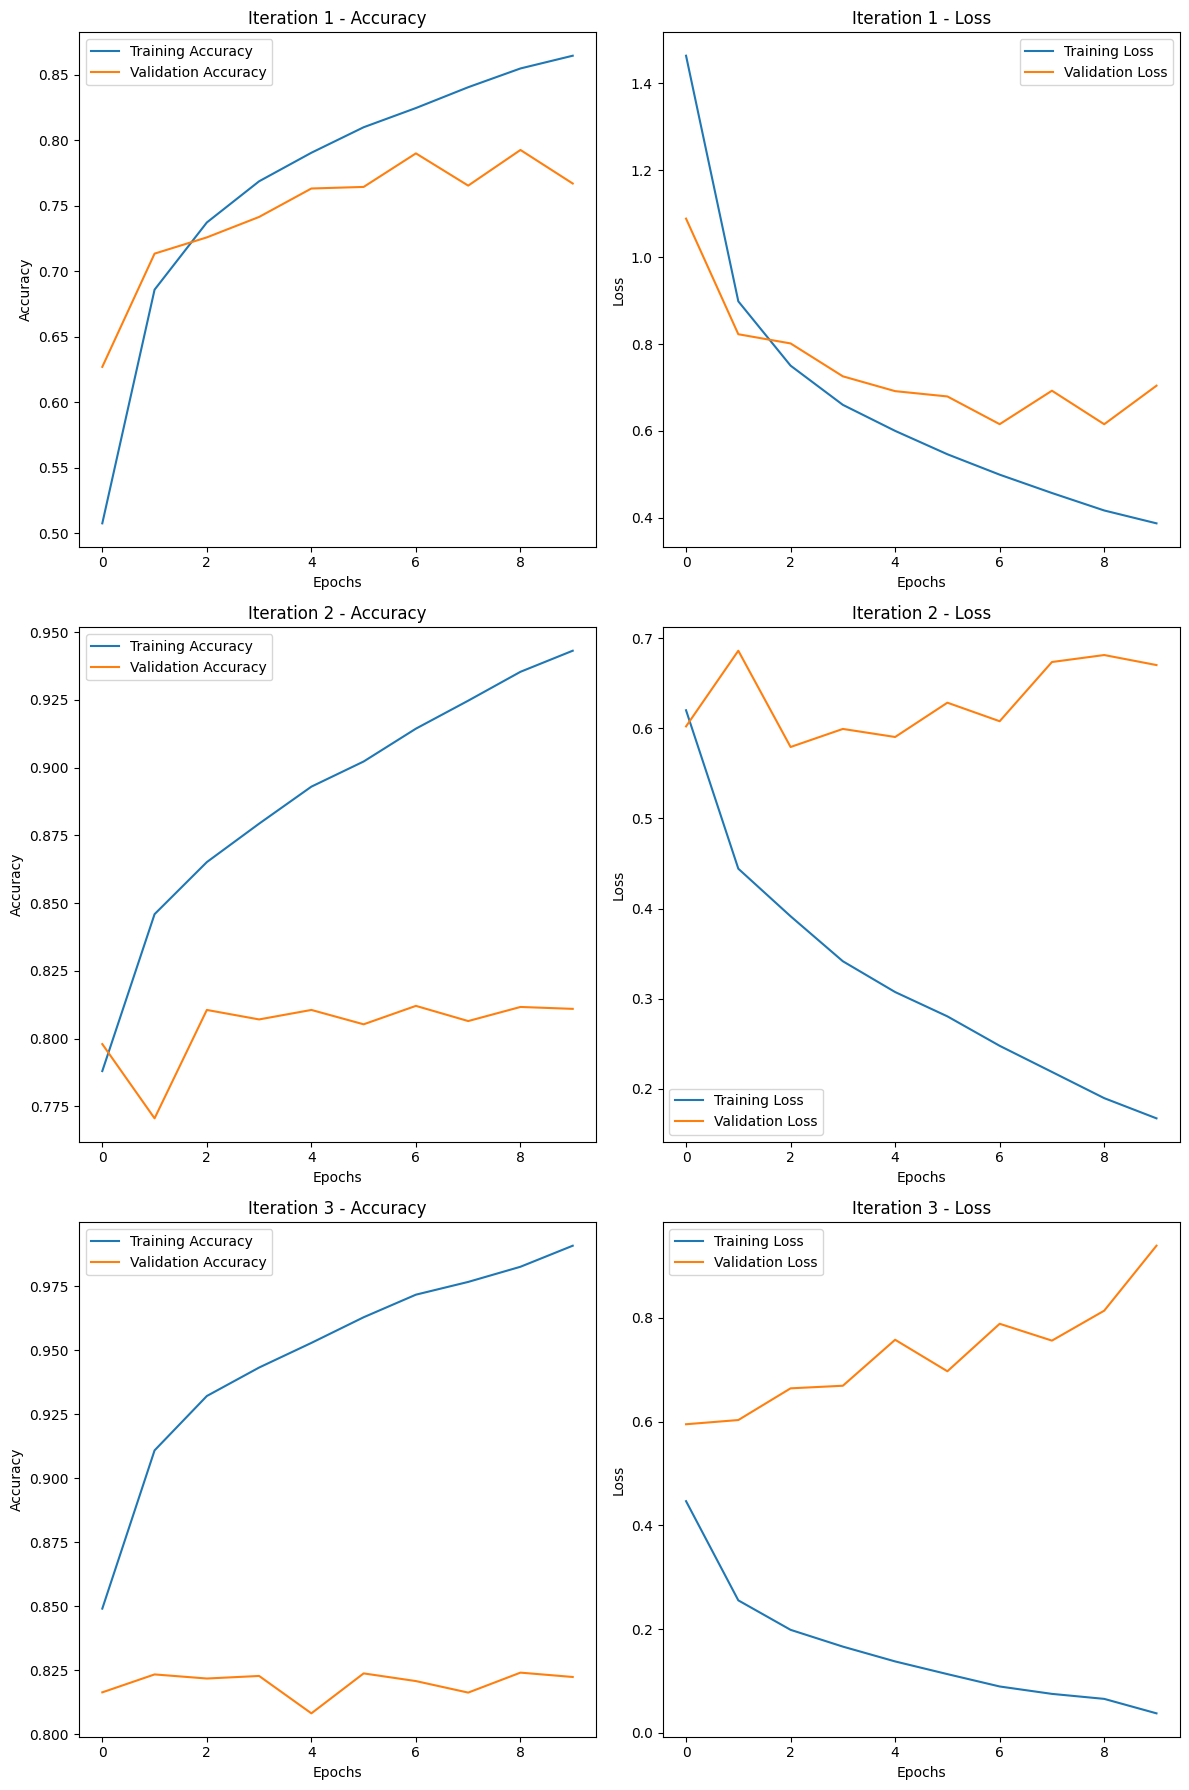

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist,cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn

def piecewise_activation(x):
    return tf.where(x > 0, x, tf.sigmoid(x))

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


ReLU+Swish

Iteration 1
Epoch 1/10
391/391 [==============================] - 107s 270ms/step - loss: 1.5267 - accuracy: 0.4927 - val_loss: 1.0569 - val_accuracy: 0.6344
Epoch 2/10
391/391 [==============================] - 106s 270ms/step - loss: 0.8952 - accuracy: 0.6908 - val_loss: 0.9518 - val_accuracy: 0.6787
Epoch 3/10
391/391 [==============================] - 106s 272ms/step - loss: 0.7517 - accuracy: 0.7395 - val_loss: 0.8423 - val_accuracy: 0.7069
Epoch 4/10
391/391 [==============================] - 105s 269ms/step - loss: 0.6673 - accuracy: 0.7705 - val_loss: 0.7190 - val_accuracy: 0.7524
Epoch 5/10
391/391 [==============================] - 106s 270ms/step - loss: 0.6053 - accuracy: 0.7908 - val_loss: 0.7105 - val_accuracy: 0.7568
Epoch 6/10
391/391 [==============================] - 106s 271ms/step - loss: 0.5524 - accuracy: 0.8092 - val_loss: 0.7093 - val_accuracy: 0.7563
Epoch 7/10
391/391 [==============================] - 106s 271ms/step - loss: 0.5102 - accuracy: 0.8216 - val_lo

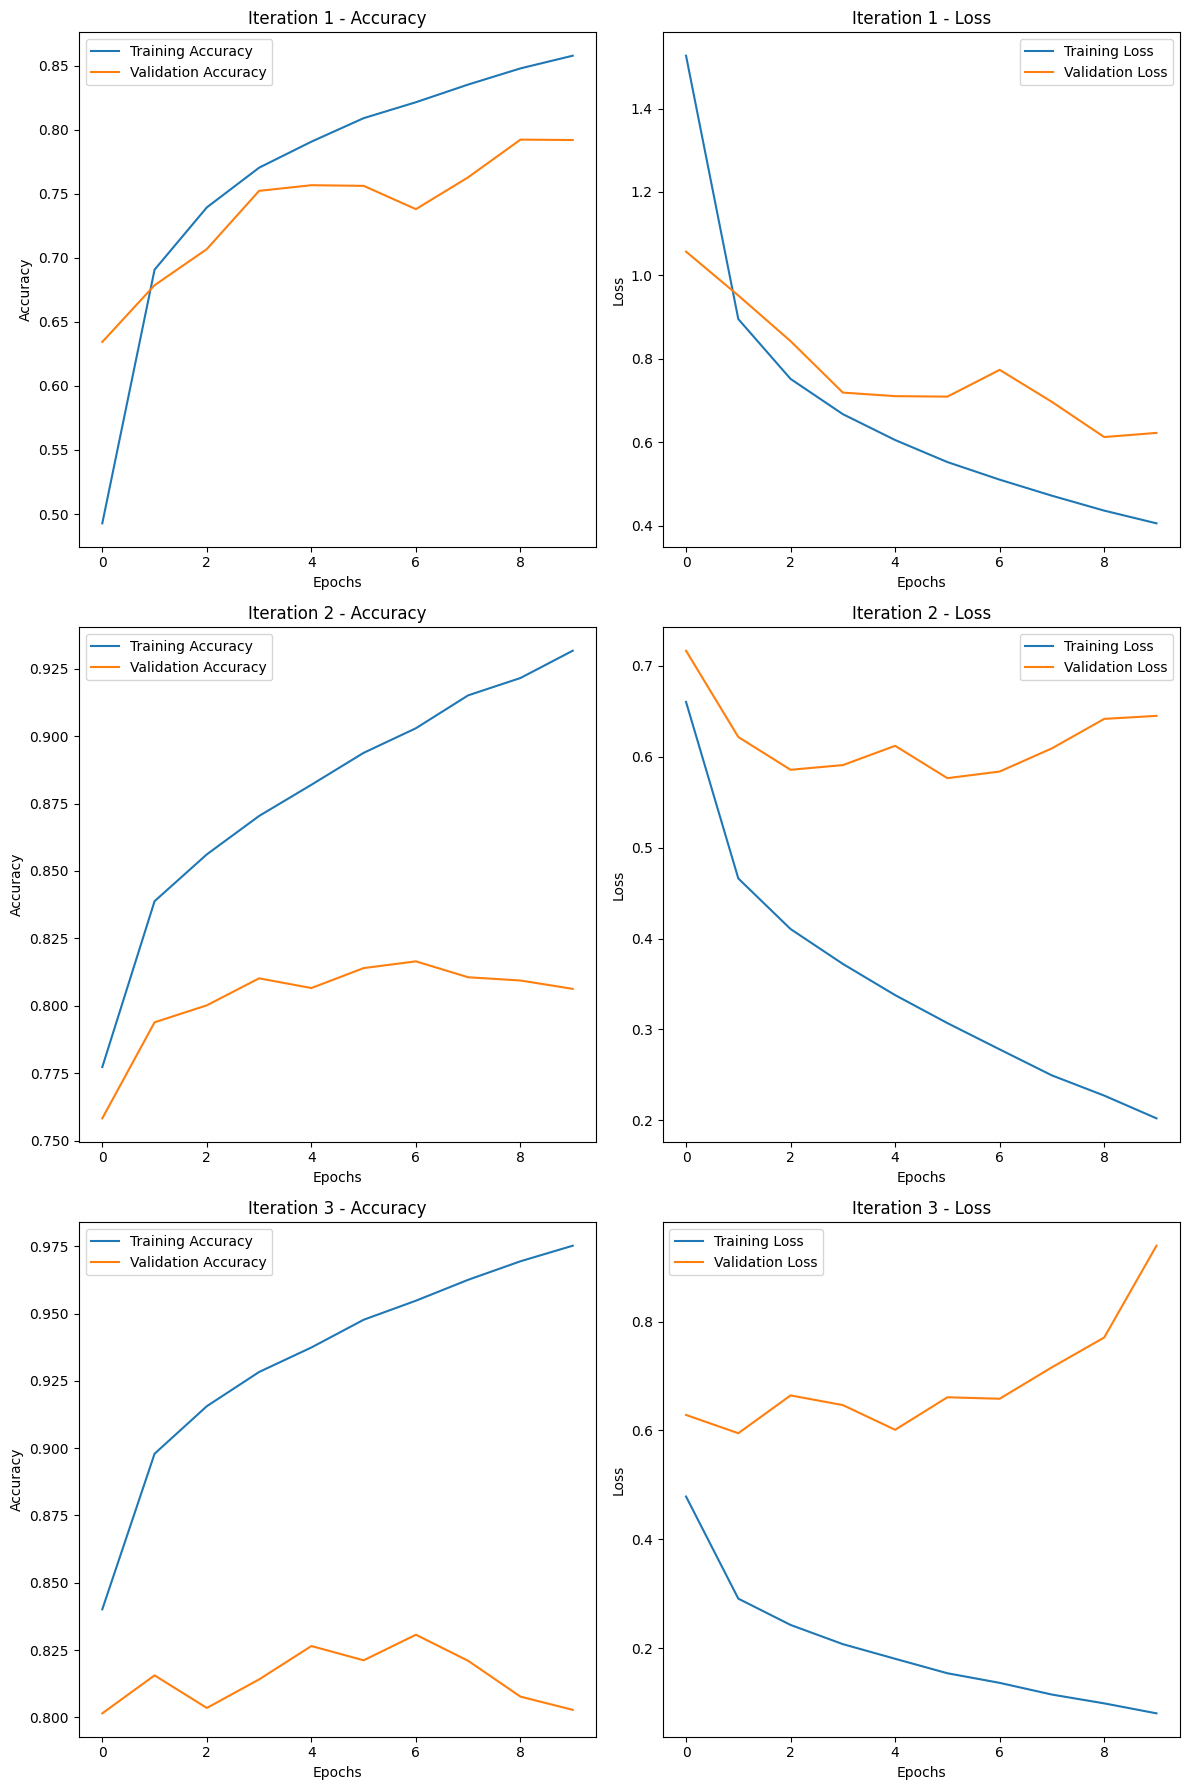

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist,cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn

def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.swish(x))


# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


Relu+softsign

Iteration 1
Epoch 1/10
391/391 [==============================] - 100s 255ms/step - loss: 1.4729 - accuracy: 0.5214 - val_loss: 1.0059 - val_accuracy: 0.6490
Epoch 2/10
391/391 [==============================] - 99s 254ms/step - loss: 0.8834 - accuracy: 0.6923 - val_loss: 0.8146 - val_accuracy: 0.7147
Epoch 3/10
391/391 [==============================] - 100s 255ms/step - loss: 0.7424 - accuracy: 0.7398 - val_loss: 0.7672 - val_accuracy: 0.7295
Epoch 4/10
391/391 [==============================] - 100s 254ms/step - loss: 0.6593 - accuracy: 0.7677 - val_loss: 0.7374 - val_accuracy: 0.7419
Epoch 5/10
391/391 [==============================] - 99s 254ms/step - loss: 0.5989 - accuracy: 0.7895 - val_loss: 0.6873 - val_accuracy: 0.7671
Epoch 6/10
391/391 [==============================] - 99s 254ms/step - loss: 0.5461 - accuracy: 0.8080 - val_loss: 0.6934 - val_accuracy: 0.7643
Epoch 7/10
391/391 [==============================] - 100s 255ms/step - loss: 0.5030 - accuracy: 0.8225 - val_loss:

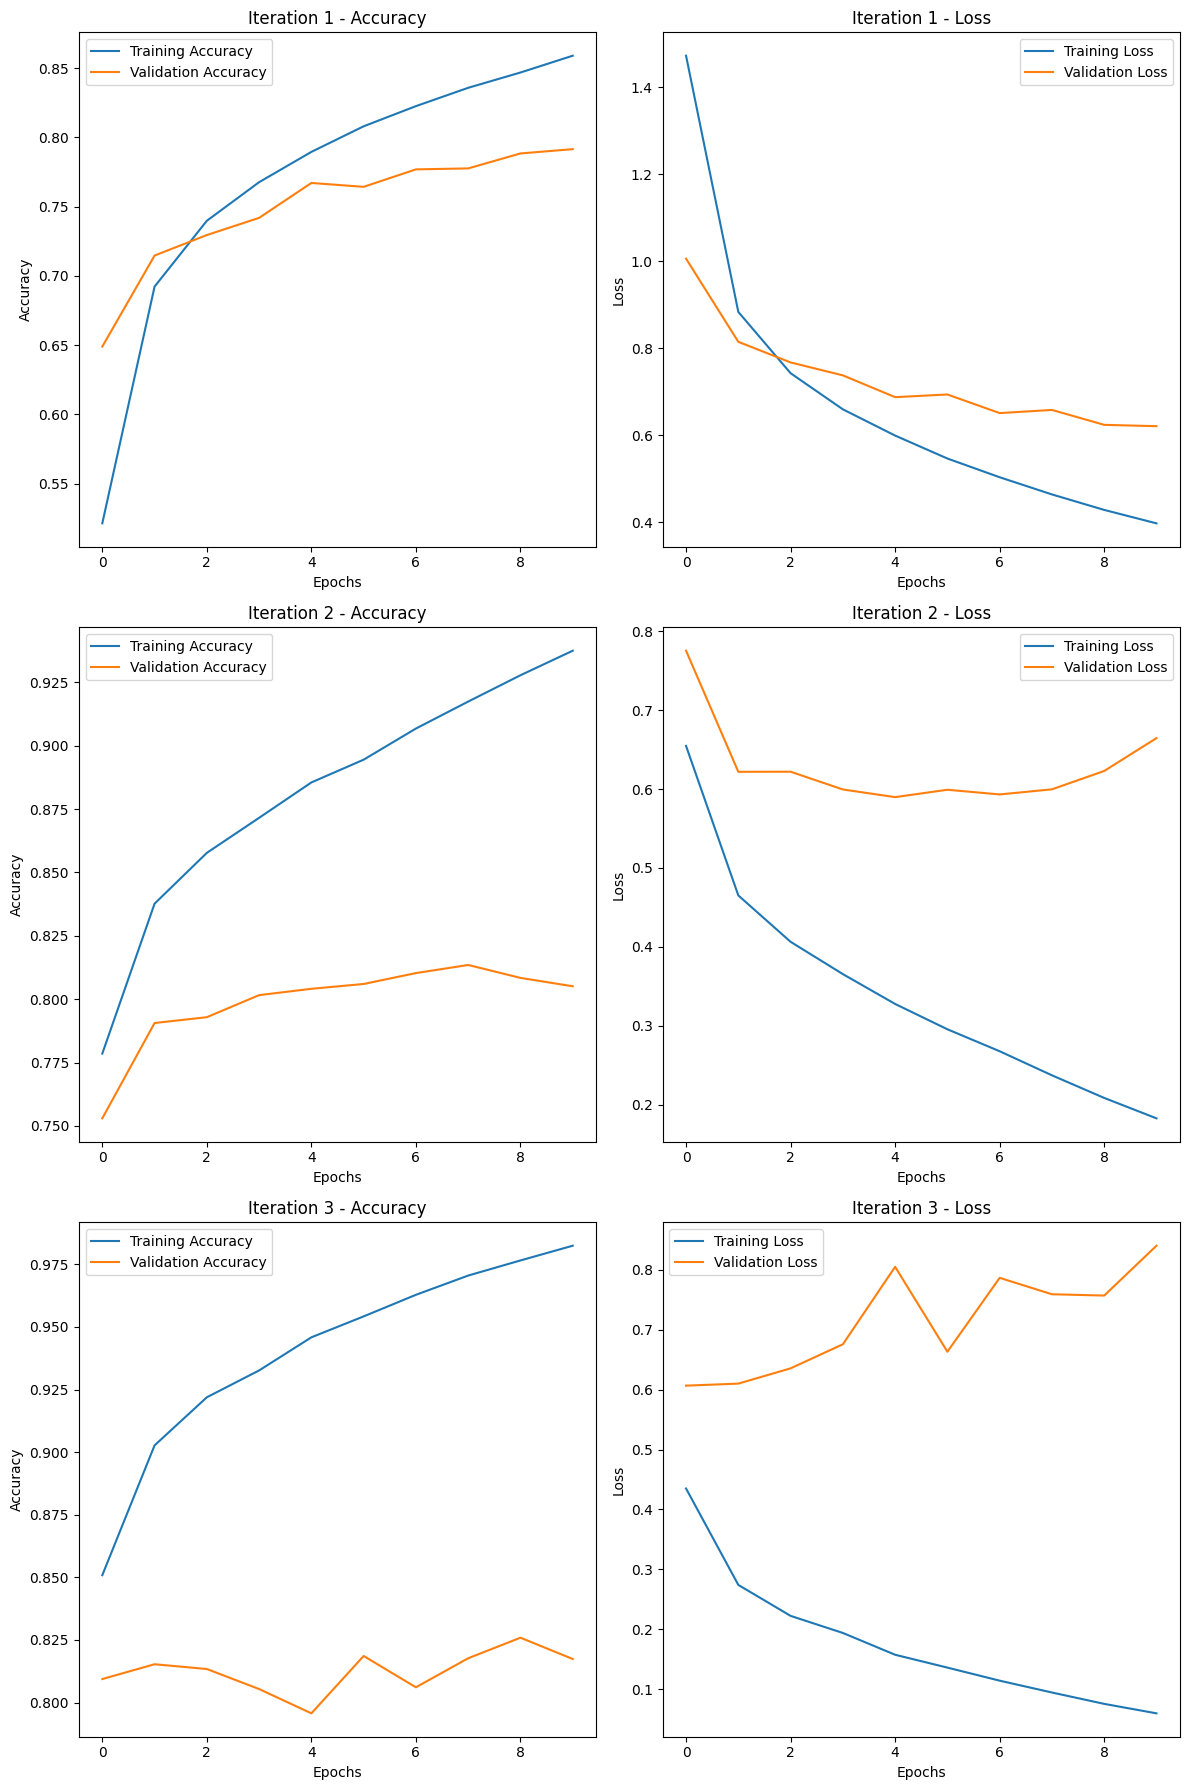

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist,cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn


def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.softsign(x))

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


Relu+Softplus

Iteration 1
Epoch 1/10
391/391 [==============================] - 110s 278ms/step - loss: 1.5046 - accuracy: 0.5080 - val_loss: 1.0492 - val_accuracy: 0.6355
Epoch 2/10
391/391 [==============================] - 108s 277ms/step - loss: 0.9086 - accuracy: 0.6863 - val_loss: 0.9195 - val_accuracy: 0.6753
Epoch 3/10
391/391 [==============================] - 108s 276ms/step - loss: 0.7617 - accuracy: 0.7369 - val_loss: 0.8031 - val_accuracy: 0.7239
Epoch 4/10
391/391 [==============================] - 108s 277ms/step - loss: 0.6746 - accuracy: 0.7657 - val_loss: 0.7402 - val_accuracy: 0.7497
Epoch 5/10
391/391 [==============================] - 108s 276ms/step - loss: 0.6040 - accuracy: 0.7898 - val_loss: 0.7260 - val_accuracy: 0.7622
Epoch 6/10
391/391 [==============================] - 108s 276ms/step - loss: 0.5502 - accuracy: 0.8093 - val_loss: 0.6772 - val_accuracy: 0.7697
Epoch 7/10
391/391 [==============================] - 109s 278ms/step - loss: 0.5024 - accuracy: 0.8247 - val_lo

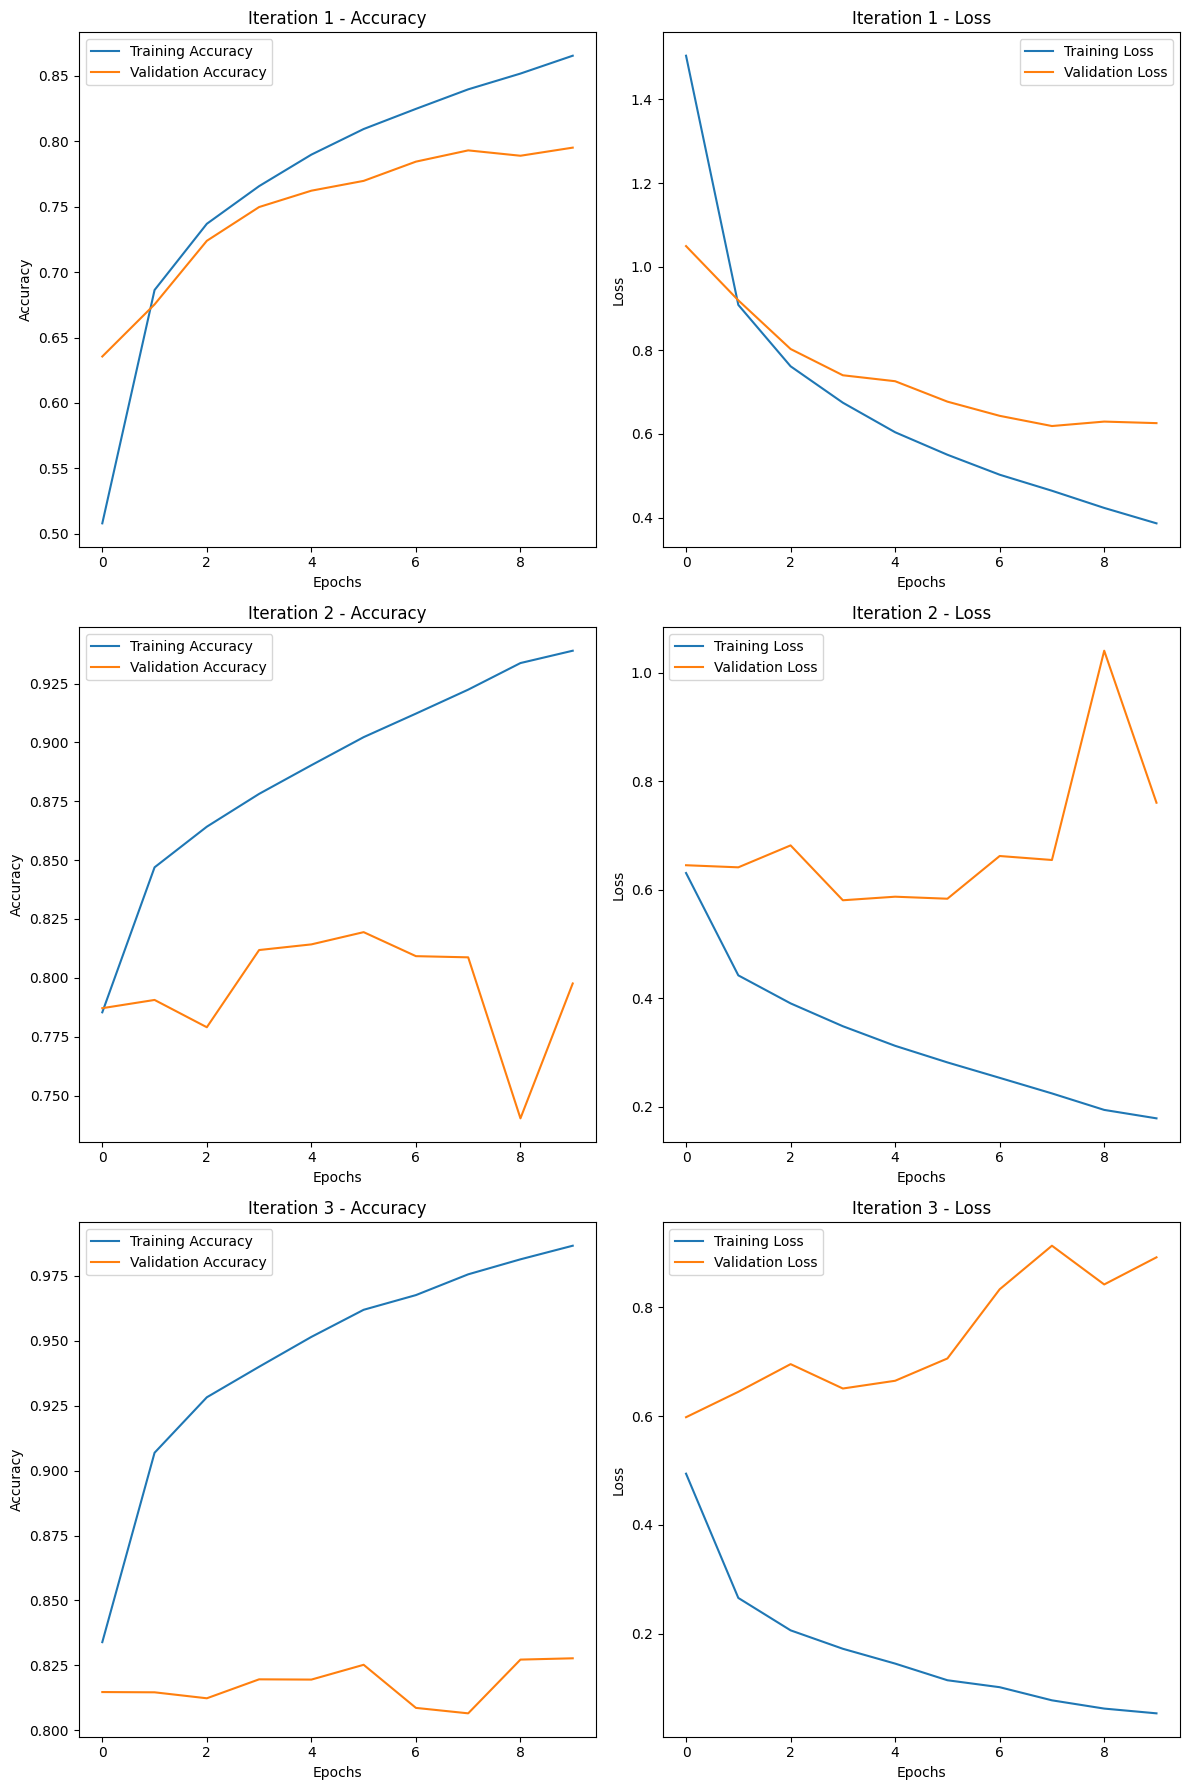

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist,cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn


def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.softplus(x))

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()

ReLU+SELU

Iteration 1
Epoch 1/10
391/391 [==============================] - 103s 260ms/step - loss: 1.6134 - accuracy: 0.4859 - val_loss: 1.0388 - val_accuracy: 0.6299
Epoch 2/10
391/391 [==============================] - 102s 260ms/step - loss: 0.9143 - accuracy: 0.6799 - val_loss: 0.9379 - val_accuracy: 0.6762
Epoch 3/10
391/391 [==============================] - 102s 260ms/step - loss: 0.7604 - accuracy: 0.7331 - val_loss: 0.8196 - val_accuracy: 0.7177
Epoch 4/10
391/391 [==============================] - 102s 260ms/step - loss: 0.6676 - accuracy: 0.7656 - val_loss: 0.7464 - val_accuracy: 0.7376
Epoch 5/10
391/391 [==============================] - 101s 259ms/step - loss: 0.5979 - accuracy: 0.7894 - val_loss: 0.8045 - val_accuracy: 0.7301
Epoch 6/10
391/391 [==============================] - 101s 259ms/step - loss: 0.5456 - accuracy: 0.8090 - val_loss: 0.6573 - val_accuracy: 0.7715
Epoch 7/10
391/391 [==============================] - 101s 258ms/step - loss: 0.5050 - accuracy: 0.8221 - val_lo

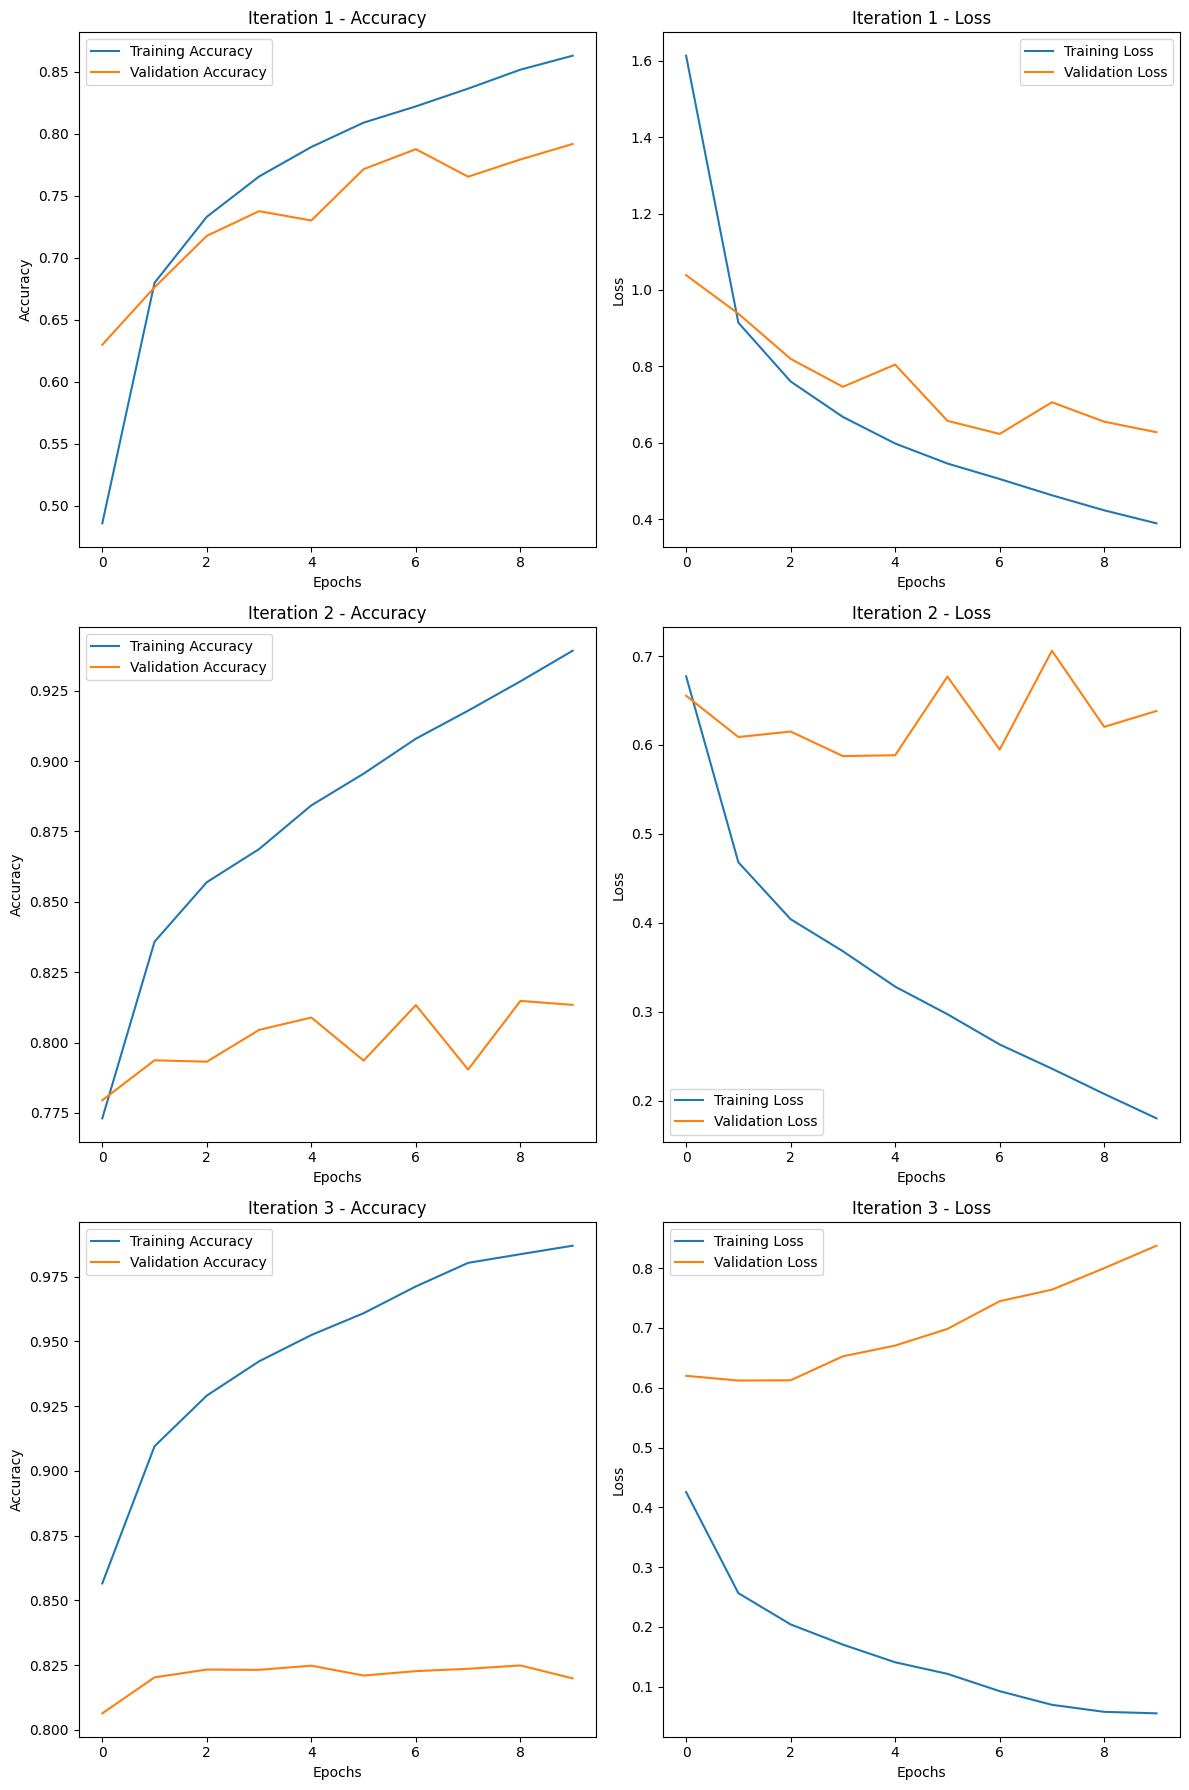

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist,cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn


def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.selu(x))


# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()


ReLU+Mish

Iteration 1
Epoch 1/10
391/391 [==============================] - 114s 288ms/step - loss: 1.5668 - accuracy: 0.4784 - val_loss: 1.0429 - val_accuracy: 0.6373
Epoch 2/10
391/391 [==============================] - 110s 280ms/step - loss: 0.9343 - accuracy: 0.6769 - val_loss: 0.8982 - val_accuracy: 0.6913
Epoch 3/10
391/391 [==============================] - 110s 281ms/step - loss: 0.7808 - accuracy: 0.7301 - val_loss: 0.7566 - val_accuracy: 0.7381
Epoch 4/10
391/391 [==============================] - 110s 280ms/step - loss: 0.6872 - accuracy: 0.7621 - val_loss: 0.7708 - val_accuracy: 0.7392
Epoch 5/10
391/391 [==============================] - 109s 280ms/step - loss: 0.6228 - accuracy: 0.7833 - val_loss: 0.7149 - val_accuracy: 0.7578
Epoch 6/10
391/391 [==============================] - 110s 282ms/step - loss: 0.5705 - accuracy: 0.8007 - val_loss: 0.7580 - val_accuracy: 0.7411
Epoch 7/10
391/391 [==============================] - 109s 280ms/step - loss: 0.5246 - accuracy: 0.8181 - val_lo

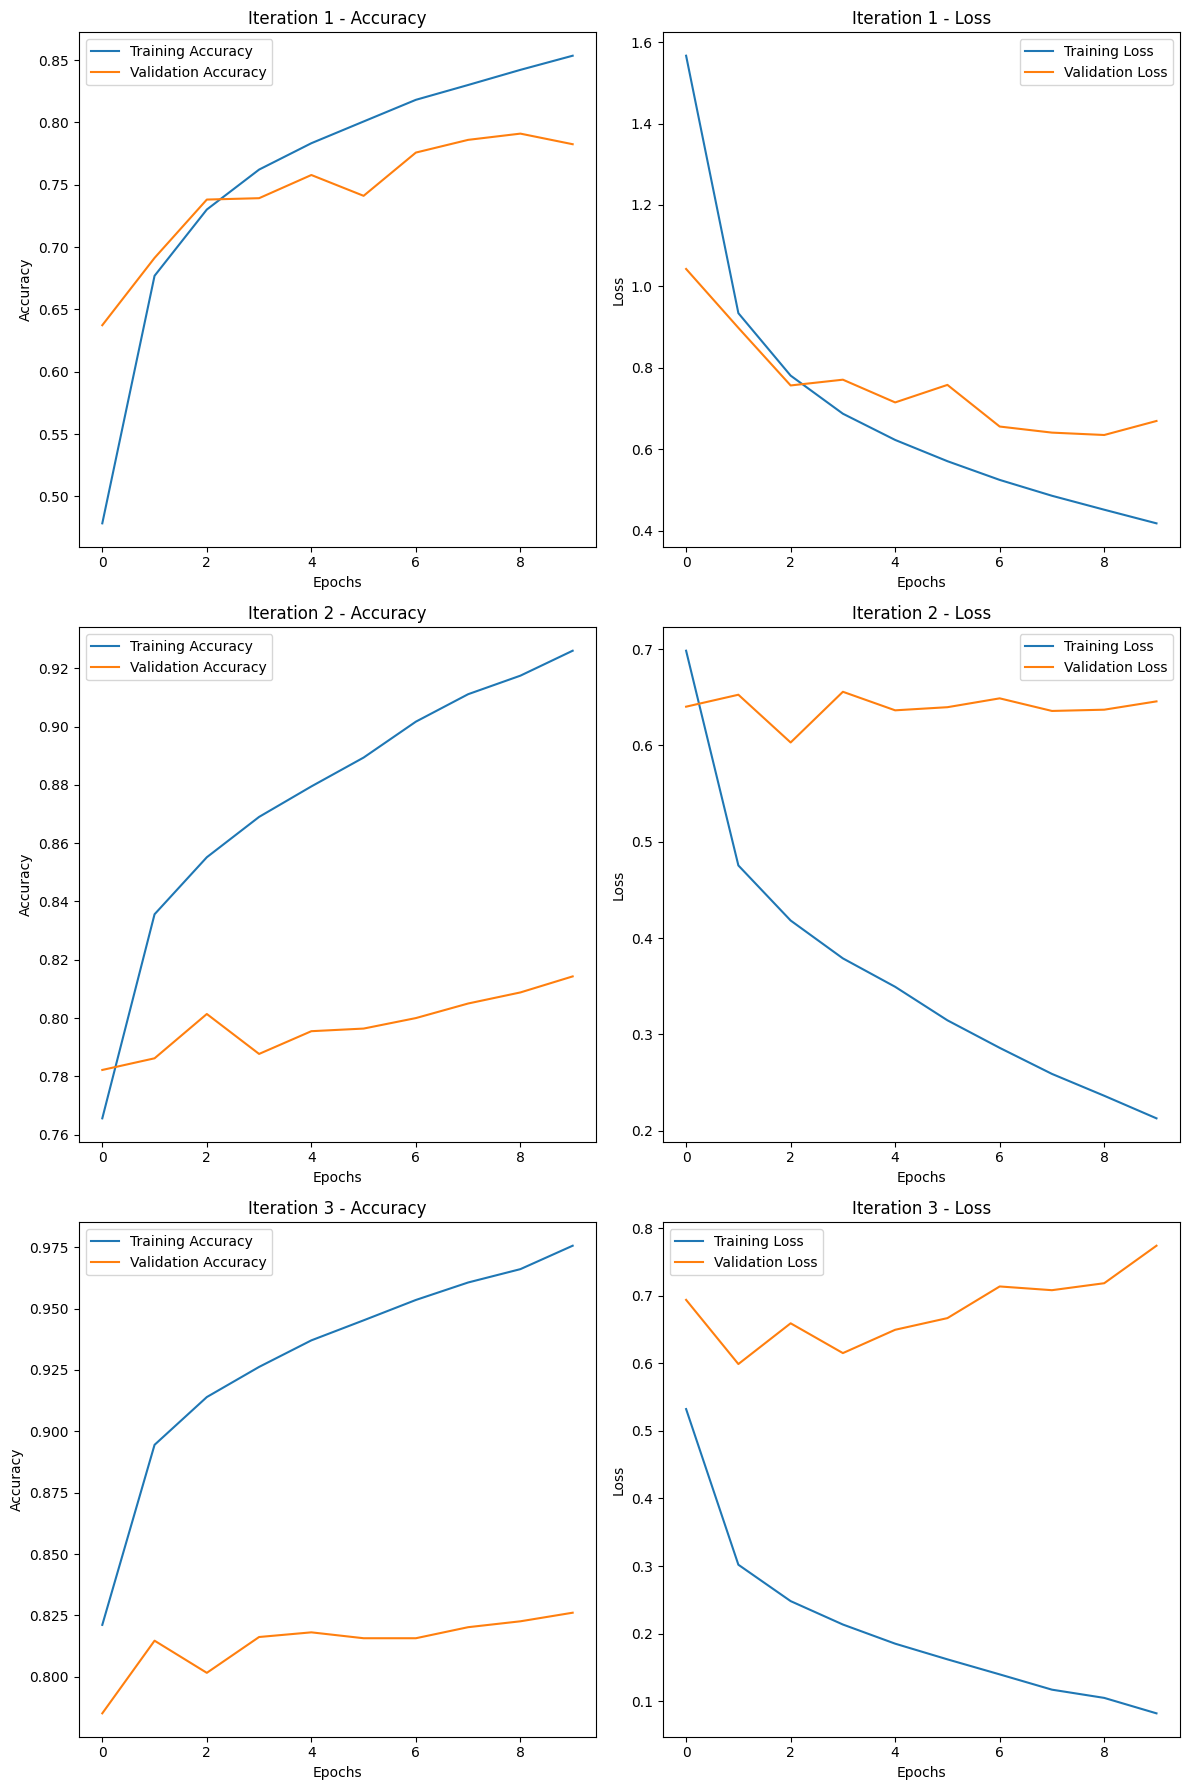

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist,cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn
from sklearn.metrics import classification_report


def m_ish(x):
    return x * tf.tanh(tf.math.softplus(x))
def piecewise_activation(x):
    return tf.where(x > 0, x, m_ish(x))

# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()

ReLU+ELU

Iteration 1
Epoch 1/10
391/391 [==============================] - 107s 272ms/step - loss: 1.4738 - accuracy: 0.5179 - val_loss: 1.0113 - val_accuracy: 0.6429
Epoch 2/10
391/391 [==============================] - 104s 266ms/step - loss: 0.9070 - accuracy: 0.6808 - val_loss: 0.8454 - val_accuracy: 0.7032
Epoch 3/10
391/391 [==============================] - 104s 266ms/step - loss: 0.7655 - accuracy: 0.7320 - val_loss: 0.8204 - val_accuracy: 0.7188
Epoch 4/10
391/391 [==============================] - 104s 266ms/step - loss: 0.6775 - accuracy: 0.7656 - val_loss: 0.7329 - val_accuracy: 0.7481
Epoch 5/10
391/391 [==============================] - 104s 266ms/step - loss: 0.6122 - accuracy: 0.7879 - val_loss: 0.6821 - val_accuracy: 0.7663
Epoch 6/10
391/391 [==============================] - 104s 266ms/step - loss: 0.5582 - accuracy: 0.8058 - val_loss: 0.6774 - val_accuracy: 0.7667
Epoch 7/10
391/391 [==============================] - 104s 266ms/step - loss: 0.5173 - accuracy: 0.8190 - val_lo

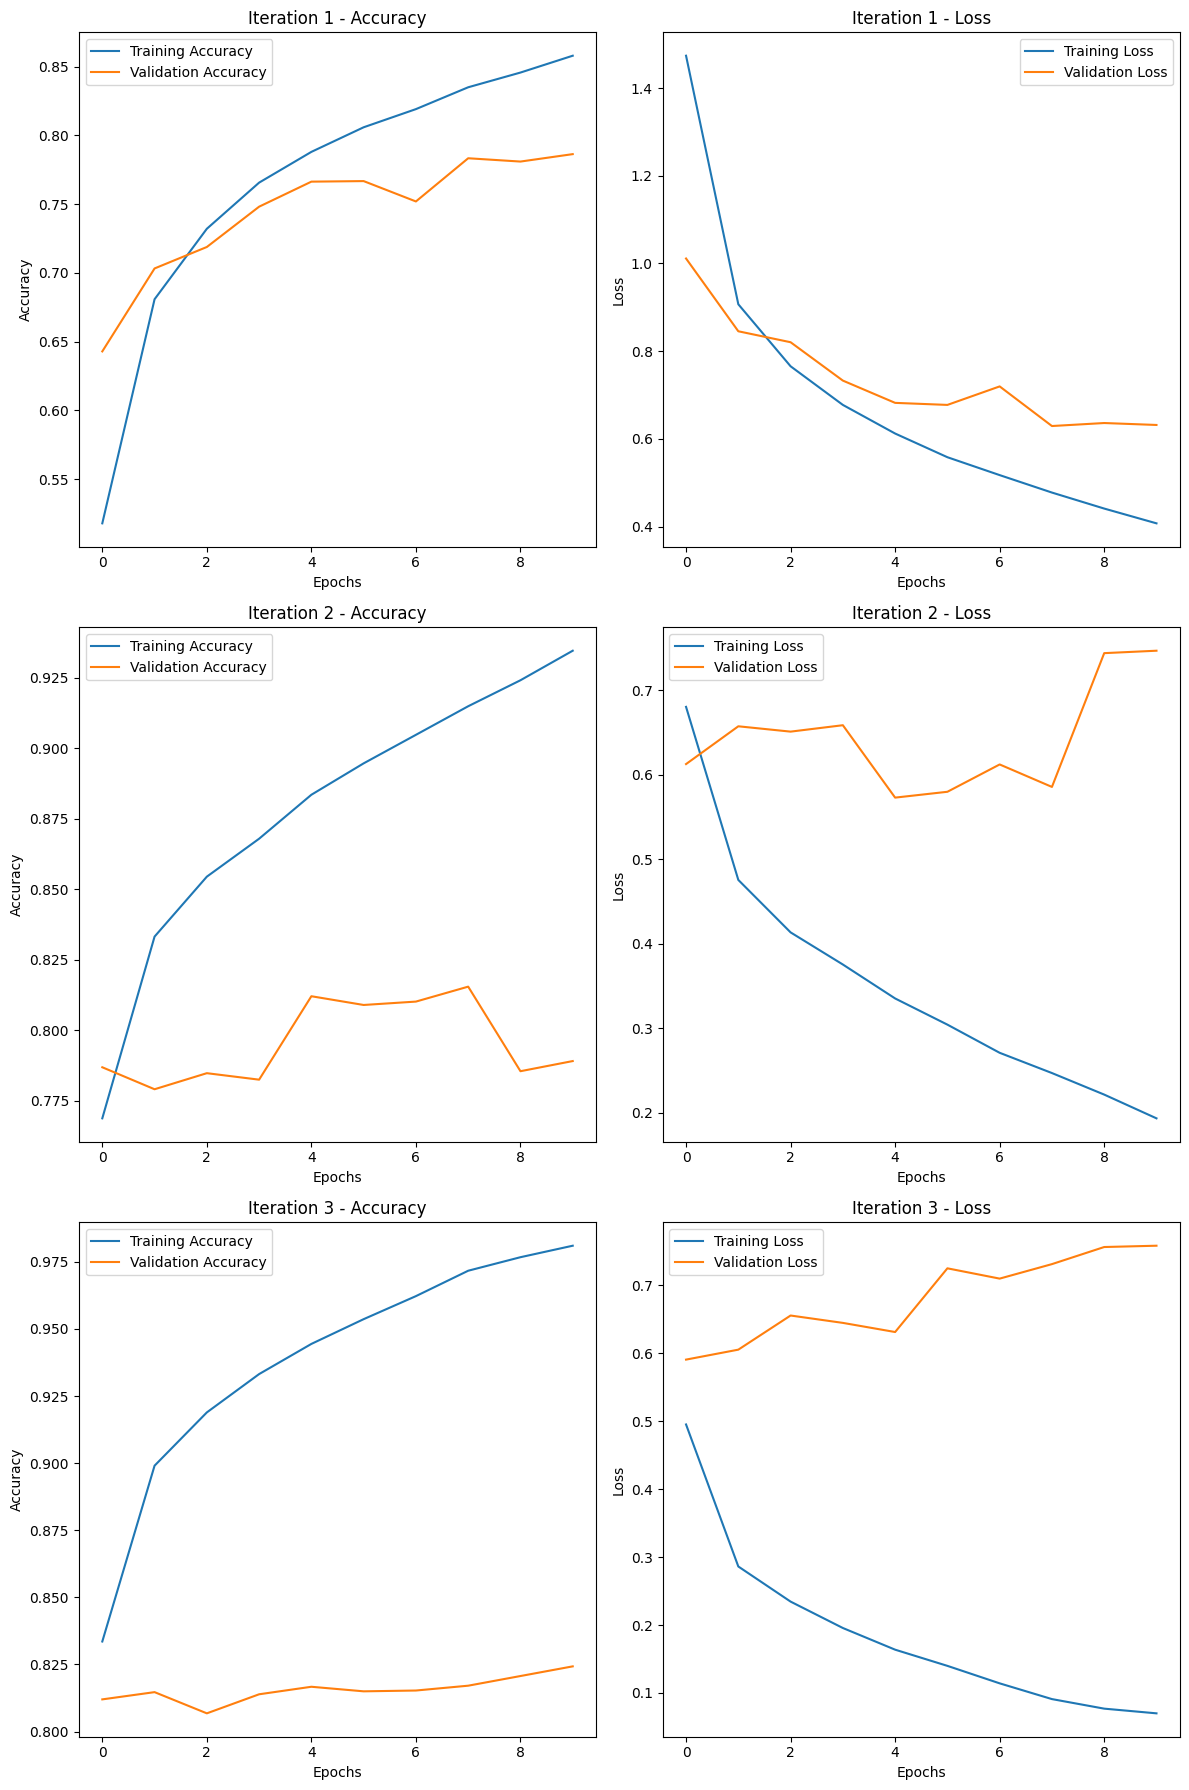

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist,cifar10
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam
import seaborn
from sklearn.metrics import classification_report


def piecewise_activation(x):
    return tf.where(x > 0, x, tf.keras.activations.elu(x))


# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Prepare the base model (VGG16 without top layer)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(32, 32, 3))

# Apply custom activation to layers
for layer in base_model.layers:
    if hasattr(layer, 'activation'):
        layer.activation = piecewise_activation

# Function to create and compile model
def create_model():
    model = models.Sequential([
        base_model,
        layers.Dense(10, activation='softmax')
    ])
    opt1 = SGD(learning_rate=0.001)
    model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Store results across iterations
accuracies = []
precisions = []
recalls = []
f1_scores = []
iterations = 3

# Create figures for plotting results
fig, axes = plt.subplots(iterations, 2, figsize=(12, 6 * iterations))

for iteration in range(iterations):
    print(f"Iteration {iteration + 1}")

    # Create a new model for each iteration
    model = create_model()

    # Train the model
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), verbose=1)

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"Test Accuracy: {test_acc}")
    print(f"Test Loss: {test_loss}")

    # Classification Report
    y_pred = model.predict(test_images)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)

    print("Classification Report:")
    report = classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0)
    print(report)

    # Append metrics to lists
    accuracies.append(test_acc)

    # Calculate precision, recall, F1 score from classification report
    report_dict = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    precision = report_dict['accuracy']
    recall = report_dict['accuracy']
    f1_score = report_dict['accuracy']
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

    # Plot accuracy and loss for the iteration
    axes[iteration, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[iteration, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[iteration, 0].set_title(f"Iteration {iteration + 1} - Accuracy")
    axes[iteration, 0].set_xlabel('Epochs')
    axes[iteration, 0].set_ylabel('Accuracy')
    axes[iteration, 0].legend()

    axes[iteration, 1].plot(history.history['loss'], label='Training Loss')
    axes[iteration, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[iteration, 1].set_title(f"Iteration {iteration + 1} - Loss")
    axes[iteration, 1].set_xlabel('Epochs')
    axes[iteration, 1].set_ylabel('Loss')
    axes[iteration, 1].legend()

# Calculate the average of all metrics across iterations
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print(f"Average Accuracy across 3 iterations: {avg_accuracy:.4f}")
print(f"Average Precision across 3 iterations: {avg_precision:.4f}")
print(f"Average Recall across 3 iterations: {avg_recall:.4f}")
print(f"Average F1-Score across 3 iterations: {avg_f1:.4f}")

# Show all iteration plots
plt.tight_layout()
plt.show()